<a href="https://colab.research.google.com/github/kambojvipul/ML_Tutorial_Scikit_Learn_Pandas_Matplotlib_Seaborn_Numpy/blob/main/Copy_of_Training_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading DataSets

In [1]:
# Mount Google Drive
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("drive/My Drive/heart_disease_data")


Mounted at /content/drive


In [2]:
import sklearn
print(sklearn.__version__)
import tensorflow as tf
print(tf.__version__)

1.0.2
2.9.2


In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

test = pd.read_csv("test.csv", index_col=False)
#print(test)

In [ ]:
x_test = test[test.keys()[:-1]]
x_test = x_test[x_test.keys()[1:]].to_numpy()
y_test = test['Labels'].to_numpy()

In [ ]:
train = pd.read_csv("train.csv")
x_train = train[train.keys()[:-1]]
x_train = x_train[x_train.keys()[1:]].to_numpy()
y_train = train['Labels'].to_numpy()

In [ ]:
x_train[0]

array([1.17552048e-03, 7.99429102e-05, 7.09566592e-04, 3.64234346e-02,
       2.07124292e-03, 1.40888440e-03, 5.66806423e-03, 3.62199413e-02,
       7.02981986e-04, 2.56327637e-03, 7.99429102e-05, 1.00000000e+00,
       4.61083509e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 6.88290743e-02, 2.40223049e-04, 8.14262200e-02,
       4.48805016e-04, 1.00000000e+00, 6.41284587e-01, 4.47641556e-01,
       8.83073309e-02, 6.92508072e-01, 1.85379988e-01, 4.56472666e-01,
       3.28452597e-01, 1.85379988e-01, 4.26543824e-01, 9.13851630e-02,
       6.81630278e-01, 7.74420457e-01, 3.57802142e-01, 3.25507642e-01,
       5.55958497e-01, 3.17835397e-01, 3.73408977e-02, 4.11181855e-02,
       2.67444957e-01, 6.67326829e-02, 8.17994475e-02, 6.57421421e-02,
       1.11013259e-01, 4.11181855e-02, 2.78430040e-02, 5.96873879e-02,
       2.05881141e-01, 2.90690958e-01, 3.20524911e-01, 4.62725994e-01,
       5.64717500e-01, 7.25678253e-01, 3.09203363e-01, 2.73238041e-02,
      

# 1) Trials on ML Models

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
#pipe = Pipeline([('extra', MinMaxScaler())])
params = [{"n_estimators":[280,300,320,350,380],"max_features":[20,22,24,26,28,30],"min_samples_split":[2],"criterion":["gini"], "random_state":[42]}]
e_clf = ExtraTreesClassifier()
gs_knn = GridSearchCV(e_clf,
                      param_grid=params,
                      scoring='accuracy',
                      cv=5)
gs_knn.fit(x_train, y_train)
gs_knn.best_params_

{'criterion': 'gini',
 'max_features': 26,
 'min_samples_split': 2,
 'n_estimators': 300,
 'random_state': 42}

In [ ]:
gs_knn.best_params_
gs_knn.score(x_test, y_test)
y_pred = gs_knn.predict(x_test)
print(classification_report(y_test, y_pred))
df_confusion = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(df_confusion)

              precision    recall  f1-score   support

           1       0.86      0.67      0.75         9
           2       0.33      0.33      0.33         6
           3       0.62      0.65      0.63        20
           4       0.56      0.50      0.53        10
           5       0.78      1.00      0.88         7

    accuracy                           0.63        52
   macro avg       0.63      0.63      0.62        52
weighted avg       0.64      0.63      0.63        52

Predicted  1  2   3  4  5  All
Actual                        
1          6  0   3  0  0    9
2          0  2   3  0  1    6
3          1  1  13  4  1   20
4          0  3   2  5  0   10
5          0  0   0  0  7    7
All        7  6  21  9  9   52


1.1) ExtraTreesClassifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification
#X, y = make_classification(n_features=4, random_state=0)
clf = ExtraTreesClassifier(n_estimators=300,max_features=20, random_state=42, min_samples_split=2, min_samples_leaf=1,criterion='gini')
clf.fit(x_train, y_train)
#ExtraTreesClassifier(random_state=0)
#clf.predict([[0, 0, 0, 0]])
#array([1])
clf.score(x_test, y_test)
#clf.get_params()

0.6538461538461539

In [ ]:
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))
df_confusion = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(df_confusion)

              precision    recall  f1-score   support

           1       0.75      0.67      0.71         9
           2       0.43      0.50      0.46         6
           3       0.65      0.65      0.65        20
           4       0.56      0.50      0.53        10
           5       0.88      1.00      0.93         7

    accuracy                           0.65        52
   macro avg       0.65      0.66      0.66        52
weighted avg       0.65      0.65      0.65        52

Predicted  1  2   3  4  5  All
Actual                        
1          6  0   3  0  0    9
2          0  3   2  0  1    6
3          2  1  13  4  0   20
4          0  3   2  5  0   10
5          0  0   0  0  7    7
All        8  7  20  9  8   52


1.2) DecisionTreeClassifier


In [ ]:
e_clf.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

#pipe = Pipeline([('extra', MinMaxScaler())])
params = [{"n_estimators":[80,120,140,160,180,200],"base_estimator":["tree"], "random_state":[42]}]
e_clf = DecisionTreeClassifier()

gs_knn = GridSearchCV(e_clf,
                      param_grid=params,
                      scoring='accuracy',
                      cv=5)

gs_knn.fit(x_train, y_train)
gs_knn.best_params_

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator=tree, n_estimators=100, random_state=42)
bagging_clf.fit(x_train, y_train)

#evaluate(bagging_clf, x_train, x_test, y_train, y_test)
bagging_clf.score(x_test, y_test)

0.6153846153846154

In [ ]:
y_pred = bagging_clf.predict(x_test)
print(classification_report(y_test, y_pred))
df_confusion = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(df_confusion)

              precision    recall  f1-score   support

           1       1.00      0.67      0.80         9
           2       0.22      0.33      0.27         6
           3       0.64      0.70      0.67        20
           4       0.38      0.30      0.33        10
           5       1.00      1.00      1.00         7

    accuracy                           0.62        52
   macro avg       0.65      0.60      0.61        52
weighted avg       0.65      0.62      0.62        52

Predicted  1  2   3  4  5  All
Actual                        
1          6  1   2  0  0    9
2          0  2   3  1  0    6
3          0  2  14  4  0   20
4          0  4   3  3  0   10
5          0  0   0  0  7    7
All        6  9  22  8  7   52


In [ ]:
print("Actual :",list(y_test))
print("Predic :",list(y_pred))

Actual : [1, 3, 2, 1, 3, 3, 5, 4, 1, 5, 3, 5, 3, 3, 4, 3, 3, 3, 3, 4, 3, 3, 1, 5, 3, 1, 2, 5, 4, 4, 4, 3, 2, 1, 3, 3, 3, 4, 3, 2, 2, 5, 3, 1, 4, 1, 3, 5, 4, 2, 1, 4]
Predic : [2, 3, 2, 1, 3, 3, 5, 2, 1, 5, 3, 5, 3, 3, 3, 4, 3, 4, 3, 3, 2, 3, 1, 5, 4, 1, 3, 5, 4, 4, 4, 4, 2, 3, 2, 3, 3, 2, 3, 3, 3, 5, 3, 3, 3, 1, 3, 5, 2, 4, 1, 2]


1.3) ExtraTreesClassifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

ex_tree_clf = ExtraTreesClassifier(n_estimators=10000, max_features=100, random_state=2)
ex_tree_clf.fit(x_train, y_train)
#evaluate(ex_tree_clf, x_train, x_test, y_train, y_test)
ex_tree_clf.score(x_test, y_test)

In [ ]:
y_pred = ex_tree_clf.predict(x_test)
print(classification_report(y_test, y_pred))
df_confusion = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(df_confusion)

In [ ]:
print("Actual :",list(y_test))
print("Predic :",list(y_pred))

1.4) AdaBoostClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost_clf = AdaBoostClassifier(n_estimators=400)
ada_boost_clf.fit(x_train, y_train)
ada_boost_clf.score(x_test, y_test)

0.40384615384615385

In [ ]:
y_pred = ada_boost_clf.predict(x_test)
print(classification_report(y_test, y_pred))
df_confusion = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(df_confusion)

              precision    recall  f1-score   support

           1       0.67      0.67      0.67         9
           2       0.08      0.17      0.11         6
           3       0.36      0.20      0.26        20
           4       0.29      0.40      0.33        10
           5       1.00      0.86      0.92         7

    accuracy                           0.40        52
   macro avg       0.48      0.46      0.46        52
weighted avg       0.45      0.40      0.42        52

Predicted  1   2   3   4  5  All
Actual                          
1          6   1   2   0  0    9
2          0   1   2   3  0    6
3          3   6   4   7  0   20
4          0   4   2   4  0   10
5          0   0   1   0  6    7
All        9  12  11  14  6   52


In [ ]:
print("Actual :",list(y_test))
print("Predic :",list(y_pred))

Actual : [1, 3, 2, 1, 3, 3, 5, 4, 1, 5, 3, 5, 3, 3, 4, 3, 3, 3, 3, 4, 3, 3, 1, 5, 3, 1, 2, 5, 4, 4, 4, 3, 2, 1, 3, 3, 3, 4, 3, 2, 2, 5, 3, 1, 4, 1, 3, 5, 4, 2, 1, 4]
Predic : [1, 1, 4, 3, 3, 3, 5, 2, 1, 5, 3, 5, 1, 3, 4, 4, 3, 4, 2, 4, 3, 4, 1, 5, 4, 1, 3, 5, 3, 4, 4, 4, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 1, 3, 5, 3, 3, 1, 3]


1.5) GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost_clf = GradientBoostingClassifier(n_estimators=70, random_state=42)
grad_boost_clf.fit(x_train, y_train)
grad_boost_clf.score(x_test, y_test)

0.5961538461538461

In [ ]:
y_pred = grad_boost_clf.predict(x_test)
print(classification_report(y_test, y_pred))
df_confusion = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(df_confusion)

              precision    recall  f1-score   support

           1       1.00      0.78      0.88         9
           2       0.33      0.50      0.40         6
           3       0.57      0.60      0.59        20
           4       0.33      0.20      0.25        10
           5       0.78      1.00      0.88         7

    accuracy                           0.60        52
   macro avg       0.60      0.62      0.60        52
weighted avg       0.60      0.60      0.59        52

Predicted  1  2   3  4  5  All
Actual                        
1          7  0   2  0  0    9
2          0  3   2  0  1    6
3          0  3  12  4  1   20
4          0  3   5  2  0   10
5          0  0   0  0  7    7
All        7  9  21  6  9   52


In [ ]:
print("Actual :",list(y_test))
print("Predic :",list(y_pred))

Actual : [1, 3, 2, 1, 3, 3, 5, 4, 1, 5, 3, 5, 3, 3, 4, 3, 3, 3, 3, 4, 3, 3, 1, 5, 3, 1, 2, 5, 4, 4, 4, 3, 2, 1, 3, 3, 3, 4, 3, 2, 2, 5, 3, 1, 4, 1, 3, 5, 4, 2, 1, 4]
Predic : [1, 1, 2, 3, 3, 3, 5, 2, 1, 5, 3, 5, 3, 3, 3, 4, 3, 3, 3, 3, 2, 3, 1, 5, 4, 1, 3, 5, 3, 4, 4, 4, 3, 3, 2, 3, 3, 3, 3, 3, 3, 5, 3, 3, 3, 1, 3, 5, 2, 3, 1, 2]


XG Boost Classifier

In [ ]:
from sklearn.ensemble import
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)
clf.score(X_test, y_t)

1.6) Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier
estimators = []

estimators.append(('extra', clf))

estimators.append(('bagging', bagging_clf))

estimators.append(('grad', grad_boost_clf))

voting = VotingClassifier(estimators=estimators)
voting.fit(x_train, y_train)
voting.score(x_test, y_test)

0.6346153846153846

In [ ]:
y_pred = voting.predict(x_test)
print(classification_report(y_test, y_pred))
df_confusion = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(df_confusion)

              precision    recall  f1-score   support

           1       0.88      0.78      0.82         9
           2       0.38      0.50      0.43         6
           3       0.62      0.65      0.63        20
           4       0.43      0.30      0.35        10
           5       0.88      1.00      0.93         7

    accuracy                           0.63        52
   macro avg       0.63      0.65      0.63        52
weighted avg       0.63      0.63      0.63        52

Predicted  1  2   3  4  5  All
Actual                        
1          7  0   2  0  0    9
2          0  3   2  0  1    6
3          1  2  13  4  0   20
4          0  3   4  3  0   10
5          0  0   0  0  7    7
All        8  8  21  7  8   52


In [ ]:
print("Actual :",list(y_test))
print("Predic :",list(y_pred))

Actual : [1, 3, 2, 1, 3, 3, 5, 4, 1, 5, 3, 5, 3, 3, 4, 3, 3, 3, 3, 4, 3, 3, 1, 5, 3, 1, 2, 5, 4, 4, 4, 3, 2, 1, 3, 3, 3, 4, 3, 2, 2, 5, 3, 1, 4, 1, 3, 5, 4, 2, 1, 4]
Predic : [1, 1, 2, 1, 3, 3, 5, 2, 1, 5, 3, 5, 1, 3, 4, 4, 3, 4, 3, 3, 2, 3, 1, 5, 4, 1, 3, 5, 4, 4, 3, 4, 3, 3, 2, 3, 3, 3, 3, 3, 3, 5, 3, 3, 3, 1, 3, 5, 2, 3, 1, 3]


# 2) Deep Learning Models

2.1) First Trial on Deep Learning Model

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd 
import seaborn as sns
# Keras
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam, Adadelta, RMSprop
import keras.backend as K
# Train-Test
from sklearn.model_selection import train_test_split
# Scaling data
from sklearn.preprocessing import StandardScaler
# Classification Report
from sklearn.metrics import classification_report

In [2]:
# Mount Google Drive
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("drive/My Drive/heart_disease_data")


Mounted at /content/drive


In [3]:
x_train = pd.read_csv("Training_set_features.csv").to_numpy()
y_train = pd.get_dummies(pd.read_csv("Training_set_Labels.csv")["Labels"]).to_numpy()
x_test = pd.read_csv("Testing_set_features.csv").to_numpy()
y_test = pd.get_dummies(pd.read_csv("Testing_set_Labels.csv")["Labels"]).to_numpy()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)


(920, 113) (920, 5) (52, 113) (52, 5)


In [4]:
np.save("keys.npy", pd.read_csv("Training_set_features.csv").keys().to_numpy())

In [15]:
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/nadam.py:78: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Nadam, self).__init__(name, **kwargs)


Epoch 1/125
25/25 [==============================] - 3s 28ms/step - loss: 1.4180 - accuracy: 0.4309 - val_loss: 2.1332 - val_accuracy: 0.1087
Epoch 2/125
25/25 [==============================] - 0s 9ms/step - loss: 1.2574 - accuracy: 0.4552 - val_loss: 1.9537 - val_accuracy: 0.1087
Epoch 3/125
25/25 [==============================] - 0s 7ms/step - loss: 1.2167 - accuracy: 0.4795 - val_loss: 1.5189 - val_accuracy: 0.5000
Epoch 4/125
25/25 [==============================] - 0s 7ms/step - loss: 1.1418 - accuracy: 0.5332 - val_loss: 2.0370 - val_accuracy: 0.0435
Epoch 5/125
25/25 [==============================] - 0s 8ms/step - loss: 1.1428 - accuracy: 0.5371 - val_loss: 0.6943 - val_accuracy: 0.8986
Epoch 6/125
25/25 [==============================] - 0s 9ms/step - loss: 1.1094 - accuracy: 0.5320 - val_loss: 0.9296 - val_accuracy: 0.7391
Epoch 7/125
25/25 [==============================] - 0s 9ms/step - loss: 1.0898 - accuracy: 0.5627 - val_loss: 1.0198 - val_accuracy: 0.7536
Epoch 8/125


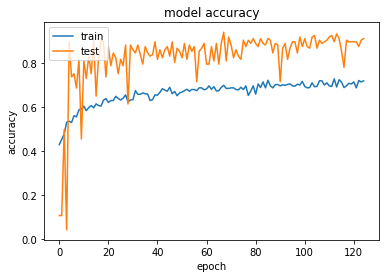

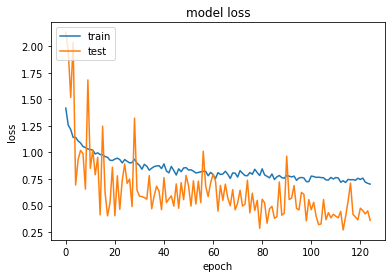

In [ ]:
keras.utils.set_random_seed(42)
model = Sequential()
model.add(Dense(60, input_shape = (113,), activation = "relu"))
model.add(Dropout(0.3))
#model.add(Dense(60, activation = "relu"))
#model.add(Dropout(0.4))
model.add(Dense(15, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(5, activation = "softmax"))
model.compile(keras.optimizers.Nadam(lr = 0.01), "categorical_crossentropy", metrics = ["accuracy"])
#model.summary()
history = model.fit(x_train, y_train,validation_split=0.15,verbose=1, epochs=125)
# list all data in history
import matplotlib.pyplot as plt# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
model.save("model_1.h5", save_format="h5")

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
model = keras.models.load_model('model_1.h5')
y_pred = model.predict(x_test)
y_pred_class = np.argmax(y_pred, axis=1)+1
y_test_class = np.argmax(y_test, axis=1)+1
#print(confusion_matrix(y_test_class, y_pred_class))
print(classification_report(y_test_class, y_pred_class))
df_confusion = pd.crosstab(y_test_class, y_pred_class, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(df_confusion)

2/2 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

           1       0.54      0.78      0.64         9
           2       0.50      0.17      0.25         6
           3       0.62      0.65      0.63        20
           4       0.71      0.50      0.59        10
           5       0.78      1.00      0.88         7

    accuracy                           0.63        52
   macro avg       0.63      0.62      0.60        52
weighted avg       0.63      0.63      0.61        52

Predicted   1  2   3  4  5  All
Actual                         
1           7  0   2  0  0    9
2           0  1   4  0  1    6
3           5  0  13  2  0   20
4           1  1   2  5  1   10
5           0  0   0  0  7    7
All        13  2  21  7  9   52


In [ ]:
print("Actu :",pd.read_csv("Testing_set_Labels.csv")["Labels"].to_numpy())
print("Pred :",y_pred_class)


Actu : [1 3 2 1 3 3 5 4 1 5 3 5 3 3 4 3 3 3 3 4 3 3 1 5 3 1 2 5 4 4 4 3 2 1 3 3 3
 4 3 2 2 5 3 1 4 1 3 5 4 2 1 4]
Pred : [1 1 2 1 3 1 5 2 1 5 1 5 3 1 4 4 3 4 3 4 3 3 1 5 1 1 3 5 4 4 4 3 3 3 3 3 3
 3 3 3 3 5 3 3 3 1 3 5 5 5 1 1]


2.2) Second Trial on Deep Learning Model

Epoch 1/175
25/25 [==============================] - 2s 18ms/step - loss: 1.5788 - accuracy: 0.2481 - val_loss: 1.9277 - val_accuracy: 0.0652
Epoch 2/175
25/25 [==============================] - 0s 8ms/step - loss: 1.4374 - accuracy: 0.3747 - val_loss: 2.0316 - val_accuracy: 0.0072
Epoch 3/175
25/25 [==============================] - 0s 7ms/step - loss: 1.3714 - accuracy: 0.4003 - val_loss: 2.0949 - val_accuracy: 0.0797
Epoch 4/175
25/25 [==============================] - 0s 7ms/step - loss: 1.3373 - accuracy: 0.4246 - val_loss: 1.8622 - val_accuracy: 0.0580
Epoch 5/175
25/25 [==============================] - 0s 8ms/step - loss: 1.2957 - accuracy: 0.4386 - val_loss: 1.8825 - val_accuracy: 0.0797
Epoch 6/175
25/25 [==============================] - 0s 8ms/step - loss: 1.2684 - accuracy: 0.4616 - val_loss: 1.9964 - val_accuracy: 0.0725
Epoch 7/175
25/25 [==============================] - 0s 7ms/step - loss: 1.2551 - accuracy: 0.4540 - val_loss: 1.8483 - val_accuracy: 0.0870
Epoch 8/175


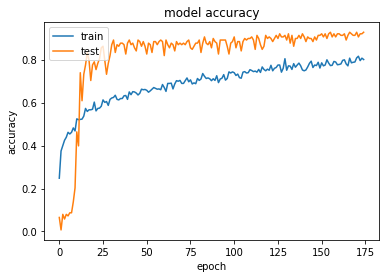

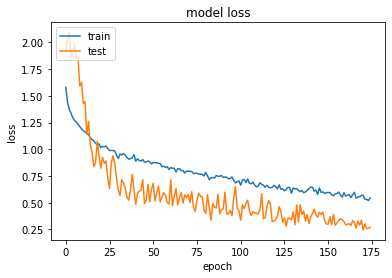

In [ ]:
import tensorflow as tf
keras.utils.set_random_seed(24)
model = Sequential()
model.add(Dense(60, input_shape = (113,), activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(60, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(15, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(5, activation = "softmax"))
model.compile(keras.optimizers.Nadam(lr = 0.001), "categorical_crossentropy", metrics = ["accuracy"])
#model.summary()
logdir = "logs"
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

history = model.fit(x_train, y_train, validation_split=0.15,verbose=1, epochs=175,  callbacks=[tensorboard_callback])

# list all data in history
import matplotlib.pyplot as plt# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
model.save("model_2.h5", save_format="h5")

In [ ]:
"""from tensorboard import notebook
notebook.list() # View open TensorBoard instances
notebook.display(port=6006, height=1000) 
%reload_ext tensorboard
%tensorboard --logdir="/content/logs"

!tensorboard dev upload \
  --logdir "/content/logs"\
  --name "experiment"\
  --description "see"\
  --one_shot
"""

`

2/2 [==============================] - 0s 10ms/step
              precision    recall  f1-score   support

           1       0.86      0.67      0.75         9
           2       0.00      0.00      0.00         6
           3       0.66      0.95      0.78        20
           4       0.83      0.50      0.62        10
           5       0.88      1.00      0.93         7

    accuracy                           0.71        52
   macro avg       0.64      0.62      0.62        52
weighted avg       0.68      0.71      0.67        52

Predicted  1  2   3  4  5  All
Actual                        
1          6  1   2  0  0    9
2          0  0   5  0  1    6
3          0  0  19  1  0   20
4          1  1   3  5  0   10
5          0  0   0  0  7    7
All        7  2  29  6  8   52


In [ ]:
print("Actu :",pd.read_csv("Testing_set_Labels.csv")["Labels"].to_numpy())
print("Pred :",y_pred_class)

Actu : [1 3 2 1 3 3 5 4 1 5 3 5 3 3 4 3 3 3 3 4 3 3 1 5 3 1 2 5 4 4 4 3 2 1 3 3 3
 4 3 2 2 5 3 1 4 1 3 5 4 2 1 4]
Pred : [2 3 5 1 3 3 5 2 1 5 3 5 3 3 4 3 3 3 3 4 3 3 1 5 3 1 3 5 4 4 4 4 3 3 3 3 3
 3 3 3 3 5 3 3 3 1 3 5 3 3 1 1]


2.3) Third Trial on Deep Learning Model

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/nadam.py:78: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Nadam, self).__init__(name, **kwargs)


Epoch 1/175
25/25 [==============================] - 2s 26ms/step - loss: 1.5632 - accuracy: 0.2685 - val_loss: 1.9886 - val_accuracy: 0.0797
Epoch 2/175
25/25 [==============================] - 0s 7ms/step - loss: 1.4013 - accuracy: 0.4156 - val_loss: 2.1831 - val_accuracy: 0.0507
Epoch 3/175
25/25 [==============================] - 0s 5ms/step - loss: 1.3356 - accuracy: 0.4143 - val_loss: 2.1094 - val_accuracy: 0.1014
Epoch 4/175
25/25 [==============================] - 0s 6ms/step - loss: 1.3003 - accuracy: 0.4488 - val_loss: 1.8882 - val_accuracy: 0.0942
Epoch 5/175
25/25 [==============================] - 0s 6ms/step - loss: 1.2621 - accuracy: 0.4668 - val_loss: 1.7276 - val_accuracy: 0.0942
Epoch 6/175
25/25 [==============================] - 0s 5ms/step - loss: 1.2189 - accuracy: 0.5000 - val_loss: 1.7946 - val_accuracy: 0.0870
Epoch 7/175
25/25 [==============================] - 0s 6ms/step - loss: 1.2120 - accuracy: 0.4898 - val_loss: 1.4607 - val_accuracy: 0.5000
Epoch 8/175


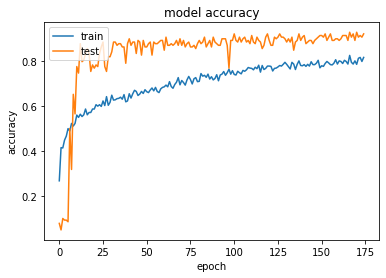

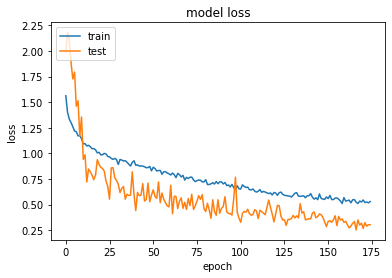

In [16]:
import tensorflow as tf
keras.utils.set_random_seed(24)
model = Sequential()
model.add(Dense(60, input_shape = (113,), activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(60, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(15, activation = "relu"))
model.add(Dropout(0.1))
model.add(Dense(5, activation = "softmax"))
model.compile(keras.optimizers.Nadam(lr = 0.001), "categorical_crossentropy", metrics = ["accuracy"])
#model.summary()
logdir = "logs"
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

history = model.fit(x_train, y_train, validation_split=0.15,verbose=1, epochs=175,  callbacks=[tensorboard_callback])

# list all data in history
import matplotlib.pyplot as plt# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
model.save("model_3.h5", save_format="h5")

In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
model = keras.models.load_model('model_3.h5')
y_pred = model.predict(x_test)
y_pred_class = np.argmax(y_pred, axis=1)+1
y_test_class = np.argmax(y_test, axis=1)+1
#print(confusion_matrix(y_test_class, y_pred_class))
print(classification_report(y_test_class, y_pred_class))
df_confusion = pd.crosstab(y_test_class, y_pred_class, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(df_confusion)

2/2 [==============================] - 0s 8ms/step
              precision    recall  f1-score   support

           1       0.86      0.67      0.75         9
           2       0.00      0.00      0.00         6
           3       0.67      1.00      0.80        20
           4       0.80      0.40      0.53        10
           5       0.78      1.00      0.88         7

    accuracy                           0.71        52
   macro avg       0.62      0.61      0.59        52
weighted avg       0.66      0.71      0.66        52

Predicted  1  2   3  4  5  All
Actual                        
1          6  0   2  1  0    9
2          0  0   5  0  1    6
3          0  0  20  0  0   20
4          1  1   3  4  1   10
5          0  0   0  0  7    7
All        7  1  30  5  9   52


In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
model = keras.models.load_model('model_3.h5')
y_pred = model.predict(x_train)
y_pred_class = np.argmax(y_pred, axis=1)+1
y_test_class = np.argmax(y_train, axis=1)+1
#print(confusion_matrix(y_test_class, y_pred_class))
print(classification_report(y_test_class, y_pred_class))
df_confusion = pd.crosstab(y_test_class, y_pred_class, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(df_confusion)

29/29 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           1       0.98      0.96      0.97       184
           2       0.80      0.90      0.85       184
           3       0.83      0.73      0.77       184
           4       0.85      0.92      0.88       184
           5       0.94      0.90      0.92       184

    accuracy                           0.88       920
   macro avg       0.88      0.88      0.88       920
weighted avg       0.88      0.88      0.88       920

Predicted    1    2    3    4    5  All
Actual                                 
1          176    0    4    0    4  184
2            0  165   10    9    0  184
3            2   24  134   18    6  184
4            0    7    8  169    0  184
5            1    9    6    2  166  184
All        179  205  162  198  176  920


In [6]:
from sklearn.metrics import precision_recall_fscore_support
#precision_recall_fscore_support(y_test_class, y_pred_class, average='macro')
p,r,f,_ = precision_recall_fscore_support(y_test_class, y_pred_class, average='weighted')
print(p,r,f)
model.predict(x_test[0:1])


0.6633089133089132 0.7115384615384616 0.6578525641025641
1/1 [==============================] - 0s 20ms/step


array([[0.2786335 , 0.00537228, 0.49106425, 0.03384204, 0.1910879 ]],
      dtype=float32)

Pyradiomics

In [8]:
!pip install pyradiomics
import numpy as np
print(np.__version__)
import pandas as pd
print(pd.__version__)
import radiomics
print(radiomics.__version__)
import six 
print(six.__version__)
#import os
import SimpleITK as sitk
print(sitk.__version__)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 15.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 KB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 555.3/555.3 KB 37.7 MB/s eta 0:00:00
  Created wheel for pyradiomics: filename=pyradiomics-3.0.1-cp38-cp38-linux_x86_64.whl size=190649 sha256=92b4134c18a2fd499ddd6d11c8635c50c9e4645ddc8f112accaa19001325dffe
  Stored in directory: /root/.cache/pip/wheels/df/be/06/5d09092e41d20673137f10ae62fb8d9da9adf14ce2552d7bea
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=8d66aaa0c33ce2d7735c0c77b6d5eca37bcd1eacaad4ceae212b3b041e16e807
  Stored in directory: /root/.cache/pip/wheels/56/ea/58/ead137b

In [9]:
imagePath = "HTN_x001A_021451_20201026_im3.nii"
maskPath = "HTN_x001A_021451_20201026_im3mask.nii"
paramPath = "params25.yaml"
keysPath = "keys.npy"


from radiomics import featureextractor  # This module is used for interaction with pyradiomics
extractor = featureextractor.RadiomicsFeatureExtractor(paramPath)

imagePath = sitk.ReadImage(imagePath)
maskPath = sitk.ReadImage(maskPath)

result = extractor.execute(imagePath, maskPath)

features = {}
print('Result type:', type(result))  # result is returned in a Python ordered dictionary)
print('')
print('Calculated features')
for key, value in six.iteritems(result):
    print('\t', key, ':', value)
    features[key] = value
print(len(features))

keys = np.load(keysPath, allow_pickle=True)

featured_cols = {}
for k in keys:
    featured_cols[k]=features[k]
featured_cols = pd.DataFrame(data = featured_cols, index=[0])
#featured_cols

INFO:radiomics.featureextractor:Loading parameter file params25.yaml
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Computing shape2D
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Adding image type "LoG" with custom settings: {'sigma': [1.0, 3.0, 5.0]}
INFO:radiomics.featureextractor:Adding image type "Wavelet" with custom settings: {}
INFO:radiomics.featureextractor:Adding image type "Logarithm" with custom settings: {}
INFO:radiomics.featureextractor:Adding image type "Exponential" with custom settings: {}
INFO:radiomics.featureextractor:Adding image type "Gradient" with custom settings: {}
INFO:radiomics.featureextractor:Adding image type "Square" with custom settings: {}
INFO:radiomics.featureextractor:Calculating featur

Result type: <class 'collections.OrderedDict'>

Calculated features
	 diagnostics_Versions_PyRadiomics : v3.0.1
	 diagnostics_Versions_Numpy : 1.21.6
	 diagnostics_Versions_SimpleITK : 2.2.1
	 diagnostics_Versions_PyWavelet : 1.4.1
	 diagnostics_Versions_Python : 3.8.10
	 diagnostics_Configuration_Settings : {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': True, 'normalizeScale': 100, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True, 'binWidth': 25}
	 diagnostics_Configuration_EnabledImageTypes : {'Original': {}, 'LoG': {'sigma': [1.0, 3.0, 5.0]}, 'Wavelet': {}, 'Logarithm': {}, 'Exponential': {}, 'Gradient': {}, 'Square': {}}
	 diagnostics_Image-original_Hash : 5e78f3010c2cc51a6da27b6811980c529fc83221
	 diagnostics_Image-original_Dimensionality : 2D
	 diagnostics_Image-original_Spa

In [10]:
model = keras.models.load_model('model_3.h5')
y_pred = model.predict(featured_cols.to_numpy())
y_pred_class = np.argmax(y_pred, axis=1)+1
print(y_pred_class)

1/1 [==============================] - 0s 117ms/step
[2]


Ensemble Extra Tree + Deep Learning Model

In [ ]:
#y_test_class = np.argmax(y_test, axis=1)+1
print(y_test_class)

y_pred_class_0 = clf.predict(x_test)
#print(y_pred_class_1)
model_1 = keras.models.load_model('model_1.h5')
y_pred = model_1.predict(x_test)
y_pred_class_1 = np.argmax(y_pred, axis=1)+1
#print(y_pred_class_1)
model_2 = keras.models.load_model('model_2.h5')
y_pred = model_2.predict(x_test)
y_pred_class_2 = np.argmax(y_pred, axis=1)+1
#print(y_pred_class_2)
model_3 = keras.models.load_model('model_3.h5')
y_pred = model_3.predict(x_test)
y_pred_class_3 = np.argmax(y_pred, axis=1)+1
#print(y_pred_class_3)



y_predd = (pd.get_dummies (y_pred_class_1)+ pd.get_dummies (y_pred_class_2)+pd.get_dummies (y_pred_class_3))/3
#print(y_predd)
y_pred_class = np.argmax(np.array(y_predd), axis=1)+1

print(classification_report(y_test, y_pred_class))
df_confusion = pd.crosstab(y_test, y_pred_class, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(df_confusion)

[1 3 2 1 3 3 5 4 1 5 3 5 3 3 4 3 3 3 3 4 3 3 1 5 3 1 2 5 4 4 4 3 2 1 3 3 3
 4 3 2 2 5 3 1 4 1 3 5 4 2 1 4]
2/2 [==============================] - 0s 9ms/step


2/2 [==============================] - 0s 12ms/step


2/2 [==============================] - 0s 11ms/step


ValueError: ignored

# Stacking Classifier

In [ ]:
test = pd.read_csv("test.csv", index_col=False)
x_test = test[test.keys()[:-1]]
x_test = x_test[x_test.keys()[1:]].to_numpy()
y_test = test['Labels'].to_numpy()

train = pd.read_csv("train.csv")
x_train = train[train.keys()[:-1]]
x_train = x_train[x_train.keys()[1:]].to_numpy()
y_train = train['Labels'].to_numpy()

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.linear_model import LogisticRegression

def create_model_1():
  keras.utils.set_random_seed(24)
  model = Sequential()
  model.add(Dense(60, input_shape = (113,), activation = "relu"))
  model.add(Dropout(0.3))
  #model.add(Dense(60, activation = "relu"))
  #model.add(Dropout(0.4))
  model.add(Dense(15, activation = "relu"))
  model.add(Dropout(0.2))
  model.add(Dense(5, activation = "softmax"))
  model.compile(keras.optimizers.Nadam(lr = 0.01), "categorical_crossentropy", metrics = ["accuracy"])
  return model

model_1 = KerasClassifier(build_fn= create_model_1, validation_split=0.15,verbose=1, epochs=125)
model_1._estimator_type = "classifier"

def create_model_2():
  keras.utils.set_random_seed(24)
  model = Sequential()
  model.add(Dense(60, input_shape = (113,), activation = "relu"))
  model.add(Dropout(0.3))
  model.add(Dense(60, activation = "relu"))
  model.add(Dropout(0.2))
  model.add(Dense(15, activation = "relu"))
  model.add(Dropout(0.2))
  model.add(Dense(5, activation = "softmax"))
  model.compile(keras.optimizers.Nadam(lr = 0.001), "categorical_crossentropy", metrics = ["accuracy"])
  return model

model_2 = KerasClassifier(build_fn= create_model_2, validation_split=0.15,verbose=1, epochs=175)
model_2._estimator_type = "classifier"

def create_model_3():
  keras.utils.set_random_seed(24)
  model = Sequential()
  model.add(Dense(60, input_shape = (113,), activation = "relu"))
  model.add(Dropout(0.3))
  model.add(Dense(60, activation = "relu"))
  model.add(Dropout(0.2))
  model.add(Dense(15, activation = "relu"))
  model.add(Dropout(0.2))
  model.add(Dense(5, activation = "softmax"))
  model.compile(keras.optimizers.Nadam(lr = 0.001), "categorical_crossentropy", metrics = ["accuracy"])
  return model

model_3 = KerasClassifier(build_fn= create_model_3, validation_split=0.15,verbose=1, epochs=175)
model_3._estimator_type = "classifier"

def create_model_4():
  model = ExtraTreesClassifier(n_estimators=300,max_features=20, random_state=42, min_samples_split=2, min_samples_leaf=1,criterion='gini')
  return model

#model_4 = KerasClassifier(build_fn= create_model_4)
model_4 = create_model_4()

estimators = [("4",model_4),("1",model_1),("2",model_2),("3",model_3)]

from sklearn.ensemble import StackingClassifier
from sklearn.neural_network import MLPClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=MLPClassifier())
clf.fit(x_train, y_train)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#model = keras.models.load_model('/content/model_3.h5')
y_pred = clf.predict(x_test)
#y_pred_class = np.argmax(y_pred, axis=1)+1
#y_test_class = np.argmax(y_test, axis=1)+1
#print(confusion_matrix(y_test_class, y_pred_class))
print(classification_report(y_test_class, y_pred_class))
df_confusion = pd.crosstab(y_test_class, y_pred_class, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(df_confusion)


<ipython-input-46-bf1231225465>:27: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_1 = KerasClassifier(build_fn= create_model_1, validation_split=0.15,verbose=1, epochs=125)
<ipython-input-46-bf1231225465>:43: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_2 = KerasClassifier(build_fn= create_model_2, validation_split=0.15,verbose=1, epochs=175)
<ipython-input-46-bf1231225465>:59: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_3 = KerasClassifier(build_fn= create_model_3, validation_split=0.15,verbose=1, epochs=175)


Epoch 1/125


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/nadam.py:78: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Nadam, self).__init__(name, **kwargs)


25/25 [==============================] - 2s 16ms/step - loss: 1.4456 - accuracy: 0.3402 - val_loss: 1.7463 - val_accuracy: 0.1087
Epoch 2/125
25/25 [==============================] - 0s 6ms/step - loss: 1.2609 - accuracy: 0.4668 - val_loss: 1.4232 - val_accuracy: 0.5072
Epoch 3/125
25/25 [==============================] - 0s 6ms/step - loss: 1.2389 - accuracy: 0.4655 - val_loss: 1.5300 - val_accuracy: 0.3043
Epoch 4/125
25/25 [==============================] - 0s 5ms/step - loss: 1.1700 - accuracy: 0.5371 - val_loss: 1.3601 - val_accuracy: 0.4130
Epoch 5/125
25/25 [==============================] - 0s 6ms/step - loss: 1.1401 - accuracy: 0.5371 - val_loss: 0.7647 - val_accuracy: 0.8913
Epoch 6/125
25/25 [==============================] - 0s 5ms/step - loss: 1.1280 - accuracy: 0.5230 - val_loss: 1.8535 - val_accuracy: 0.1159
Epoch 7/125
25/25 [==============================] - 0s 5ms/step - loss: 1.1050 - accuracy: 0.5396 - val_loss: 1.4443 - val_accuracy: 0.5217
Epoch 8/125
25/25 [=====

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/nadam.py:78: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Nadam, self).__init__(name, **kwargs)


20/20 [==============================] - 1s 15ms/step - loss: 1.4185 - accuracy: 0.3632 - val_loss: 2.2118 - val_accuracy: 0.0000e+00
Epoch 2/125
20/20 [==============================] - 0s 6ms/step - loss: 1.3019 - accuracy: 0.4464 - val_loss: 2.5310 - val_accuracy: 0.0000e+00
Epoch 3/125
20/20 [==============================] - 0s 6ms/step - loss: 1.2176 - accuracy: 0.4816 - val_loss: 1.8638 - val_accuracy: 0.0000e+00
Epoch 4/125
20/20 [==============================] - 0s 6ms/step - loss: 1.1835 - accuracy: 0.5104 - val_loss: 1.9131 - val_accuracy: 0.0000e+00
Epoch 5/125
20/20 [==============================] - 0s 5ms/step - loss: 1.1680 - accuracy: 0.5008 - val_loss: 1.7321 - val_accuracy: 0.0000e+00
Epoch 6/125
20/20 [==============================] - 0s 6ms/step - loss: 1.1388 - accuracy: 0.5328 - val_loss: 1.3411 - val_accuracy: 0.6577
Epoch 7/125
20/20 [==============================] - 0s 5ms/step - loss: 1.1143 - accuracy: 0.5200 - val_loss: 2.0140 - val_accuracy: 0.0000e+00


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/nadam.py:78: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Nadam, self).__init__(name, **kwargs)


20/20 [==============================] - 1s 16ms/step - loss: 1.4576 - accuracy: 0.3520 - val_loss: 2.5729 - val_accuracy: 0.0090
Epoch 2/125
20/20 [==============================] - 0s 6ms/step - loss: 1.3187 - accuracy: 0.4400 - val_loss: 2.1210 - val_accuracy: 0.0000e+00
Epoch 3/125
20/20 [==============================] - 0s 6ms/step - loss: 1.2361 - accuracy: 0.4896 - val_loss: 1.9695 - val_accuracy: 0.0000e+00
Epoch 4/125
20/20 [==============================] - 0s 5ms/step - loss: 1.1897 - accuracy: 0.4880 - val_loss: 2.9631 - val_accuracy: 0.0000e+00
Epoch 5/125
20/20 [==============================] - 0s 7ms/step - loss: 1.1389 - accuracy: 0.5392 - val_loss: 1.3598 - val_accuracy: 0.5856
Epoch 6/125
20/20 [==============================] - 0s 6ms/step - loss: 1.1157 - accuracy: 0.4976 - val_loss: 1.6235 - val_accuracy: 0.4775
Epoch 7/125
20/20 [==============================] - 0s 5ms/step - loss: 1.0935 - accuracy: 0.5280 - val_loss: 1.3999 - val_accuracy: 0.6036
Epoch 8/125


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/nadam.py:78: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Nadam, self).__init__(name, **kwargs)


20/20 [==============================] - 1s 17ms/step - loss: 1.4449 - accuracy: 0.3520 - val_loss: 1.5660 - val_accuracy: 0.2162
Epoch 2/125
20/20 [==============================] - 0s 5ms/step - loss: 1.3796 - accuracy: 0.4256 - val_loss: 1.8006 - val_accuracy: 0.0360
Epoch 3/125
20/20 [==============================] - 0s 5ms/step - loss: 1.2783 - accuracy: 0.4240 - val_loss: 1.6827 - val_accuracy: 0.3063
Epoch 4/125
20/20 [==============================] - 0s 6ms/step - loss: 1.2420 - accuracy: 0.4640 - val_loss: 1.2317 - val_accuracy: 0.7027
Epoch 5/125
20/20 [==============================] - 0s 5ms/step - loss: 1.2456 - accuracy: 0.4560 - val_loss: 1.1042 - val_accuracy: 0.7027
Epoch 6/125
20/20 [==============================] - 0s 6ms/step - loss: 1.1646 - accuracy: 0.5152 - val_loss: 0.9433 - val_accuracy: 0.8198
Epoch 7/125
20/20 [==============================] - 0s 6ms/step - loss: 1.1101 - accuracy: 0.5120 - val_loss: 0.6411 - val_accuracy: 0.8829
Epoch 8/125
20/20 [=====

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/nadam.py:78: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Nadam, self).__init__(name, **kwargs)


20/20 [==============================] - 1s 17ms/step - loss: 1.4825 - accuracy: 0.3440 - val_loss: 1.7360 - val_accuracy: 0.2252
Epoch 2/125
20/20 [==============================] - 0s 7ms/step - loss: 1.3614 - accuracy: 0.4144 - val_loss: 1.8685 - val_accuracy: 0.0000e+00
Epoch 3/125
20/20 [==============================] - 0s 6ms/step - loss: 1.2752 - accuracy: 0.4352 - val_loss: 1.0041 - val_accuracy: 0.8559
Epoch 4/125
20/20 [==============================] - 0s 6ms/step - loss: 1.2218 - accuracy: 0.4864 - val_loss: 1.4368 - val_accuracy: 0.5586
Epoch 5/125
20/20 [==============================] - 0s 5ms/step - loss: 1.2064 - accuracy: 0.5024 - val_loss: 0.8117 - val_accuracy: 0.8739
Epoch 6/125
20/20 [==============================] - 0s 6ms/step - loss: 1.1600 - accuracy: 0.5104 - val_loss: 0.7761 - val_accuracy: 0.7207
Epoch 7/125
20/20 [==============================] - 0s 5ms/step - loss: 1.0885 - accuracy: 0.5424 - val_loss: 0.9556 - val_accuracy: 0.7297
Epoch 8/125
20/20 [=

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/nadam.py:78: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Nadam, self).__init__(name, **kwargs)


20/20 [==============================] - 44s 16ms/step - loss: 1.4636 - accuracy: 0.3536 - val_loss: 1.8159 - val_accuracy: 0.0000e+00
Epoch 2/125
20/20 [==============================] - 0s 5ms/step - loss: 1.3392 - accuracy: 0.4176 - val_loss: 1.6063 - val_accuracy: 0.0180
Epoch 3/125
20/20 [==============================] - 0s 7ms/step - loss: 1.2919 - accuracy: 0.4256 - val_loss: 1.1444 - val_accuracy: 0.8018
Epoch 4/125
20/20 [==============================] - 0s 5ms/step - loss: 1.2496 - accuracy: 0.4464 - val_loss: 1.6457 - val_accuracy: 0.4595
Epoch 5/125
20/20 [==============================] - 0s 5ms/step - loss: 1.2115 - accuracy: 0.4640 - val_loss: 0.8590 - val_accuracy: 0.8829
Epoch 6/125
20/20 [==============================] - 0s 6ms/step - loss: 1.1615 - accuracy: 0.4912 - val_loss: 0.6943 - val_accuracy: 0.7658
Epoch 7/125
20/20 [==============================] - 0s 5ms/step - loss: 1.1537 - accuracy: 0.5136 - val_loss: 0.8902 - val_accuracy: 0.8378
Epoch 8/125
20/20 [

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/nadam.py:78: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Nadam, self).__init__(name, **kwargs)


20/20 [==============================] - 2s 17ms/step - loss: 1.5970 - accuracy: 0.2416 - val_loss: 1.9966 - val_accuracy: 0.0000e+00
Epoch 2/175
20/20 [==============================] - 0s 5ms/step - loss: 1.4436 - accuracy: 0.3664 - val_loss: 2.2808 - val_accuracy: 0.0000e+00
Epoch 3/175
20/20 [==============================] - 0s 6ms/step - loss: 1.3584 - accuracy: 0.4080 - val_loss: 2.2733 - val_accuracy: 0.0000e+00
Epoch 4/175
20/20 [==============================] - 0s 6ms/step - loss: 1.3359 - accuracy: 0.4192 - val_loss: 2.2248 - val_accuracy: 0.0000e+00
Epoch 5/175
20/20 [==============================] - 0s 6ms/step - loss: 1.3344 - accuracy: 0.4304 - val_loss: 2.1849 - val_accuracy: 0.0000e+00
Epoch 6/175
20/20 [==============================] - 0s 6ms/step - loss: 1.2919 - accuracy: 0.4400 - val_loss: 2.1756 - val_accuracy: 0.0000e+00
Epoch 7/175
20/20 [==============================] - 0s 7ms/step - loss: 1.2746 - accuracy: 0.4416 - val_loss: 2.1923 - val_accuracy: 0.0000e

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/nadam.py:78: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Nadam, self).__init__(name, **kwargs)


20/20 [==============================] - 2s 17ms/step - loss: 1.5912 - accuracy: 0.2592 - val_loss: 1.9732 - val_accuracy: 0.0000e+00
Epoch 2/175
20/20 [==============================] - 0s 7ms/step - loss: 1.4601 - accuracy: 0.3376 - val_loss: 2.1750 - val_accuracy: 0.0000e+00
Epoch 3/175
20/20 [==============================] - 0s 7ms/step - loss: 1.3880 - accuracy: 0.4016 - val_loss: 2.1428 - val_accuracy: 0.0000e+00
Epoch 4/175
20/20 [==============================] - 0s 7ms/step - loss: 1.3174 - accuracy: 0.4480 - val_loss: 2.3355 - val_accuracy: 0.0000e+00
Epoch 5/175
20/20 [==============================] - 0s 6ms/step - loss: 1.2886 - accuracy: 0.4448 - val_loss: 2.1216 - val_accuracy: 0.0000e+00
Epoch 6/175
20/20 [==============================] - 0s 7ms/step - loss: 1.3100 - accuracy: 0.4192 - val_loss: 2.0814 - val_accuracy: 0.0000e+00
Epoch 7/175
20/20 [==============================] - 0s 6ms/step - loss: 1.2509 - accuracy: 0.4608 - val_loss: 2.2624 - val_accuracy: 0.0000e

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/nadam.py:78: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Nadam, self).__init__(name, **kwargs)


20/20 [==============================] - 2s 17ms/step - loss: 1.6204 - accuracy: 0.2128 - val_loss: 1.8082 - val_accuracy: 0.0180
Epoch 2/175
20/20 [==============================] - 0s 7ms/step - loss: 1.4973 - accuracy: 0.3440 - val_loss: 1.9151 - val_accuracy: 0.0000e+00
Epoch 3/175
20/20 [==============================] - 0s 7ms/step - loss: 1.4138 - accuracy: 0.3968 - val_loss: 1.7798 - val_accuracy: 0.0270
Epoch 4/175
20/20 [==============================] - 0s 7ms/step - loss: 1.3527 - accuracy: 0.4144 - val_loss: 1.6479 - val_accuracy: 0.0721
Epoch 5/175
20/20 [==============================] - 0s 6ms/step - loss: 1.3608 - accuracy: 0.4048 - val_loss: 1.6417 - val_accuracy: 0.1441
Epoch 6/175
20/20 [==============================] - 0s 6ms/step - loss: 1.3037 - accuracy: 0.4096 - val_loss: 1.6380 - val_accuracy: 0.1441
Epoch 7/175
20/20 [==============================] - 0s 7ms/step - loss: 1.2919 - accuracy: 0.4432 - val_loss: 1.7447 - val_accuracy: 0.0811
Epoch 8/175
20/20 [=

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/nadam.py:78: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Nadam, self).__init__(name, **kwargs)


20/20 [==============================] - 2s 18ms/step - loss: 1.6109 - accuracy: 0.2256 - val_loss: 1.8189 - val_accuracy: 0.0090
Epoch 2/175
20/20 [==============================] - 0s 6ms/step - loss: 1.4833 - accuracy: 0.3616 - val_loss: 1.8854 - val_accuracy: 0.0000e+00
Epoch 3/175
20/20 [==============================] - 0s 6ms/step - loss: 1.4061 - accuracy: 0.3888 - val_loss: 1.7998 - val_accuracy: 0.0090
Epoch 4/175
20/20 [==============================] - 0s 7ms/step - loss: 1.3312 - accuracy: 0.4240 - val_loss: 1.7471 - val_accuracy: 0.0090
Epoch 5/175
20/20 [==============================] - 0s 6ms/step - loss: 1.3552 - accuracy: 0.4128 - val_loss: 1.6828 - val_accuracy: 0.0721
Epoch 6/175
20/20 [==============================] - 0s 6ms/step - loss: 1.3332 - accuracy: 0.4192 - val_loss: 1.5850 - val_accuracy: 0.1622
Epoch 7/175
20/20 [==============================] - 0s 6ms/step - loss: 1.2956 - accuracy: 0.4464 - val_loss: 1.6798 - val_accuracy: 0.1441
Epoch 8/175
20/20 [=

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/nadam.py:78: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Nadam, self).__init__(name, **kwargs)


20/20 [==============================] - 2s 17ms/step - loss: 1.6003 - accuracy: 0.2384 - val_loss: 1.8740 - val_accuracy: 0.0000e+00
Epoch 2/175
20/20 [==============================] - 0s 7ms/step - loss: 1.4839 - accuracy: 0.3344 - val_loss: 1.9216 - val_accuracy: 0.0000e+00
Epoch 3/175
20/20 [==============================] - 0s 6ms/step - loss: 1.4194 - accuracy: 0.3648 - val_loss: 1.8118 - val_accuracy: 0.0000e+00
Epoch 4/175
20/20 [==============================] - 0s 7ms/step - loss: 1.3558 - accuracy: 0.3920 - val_loss: 1.7586 - val_accuracy: 0.0000e+00
Epoch 5/175
20/20 [==============================] - 0s 6ms/step - loss: 1.3474 - accuracy: 0.4256 - val_loss: 1.6852 - val_accuracy: 0.0000e+00
Epoch 6/175
20/20 [==============================] - 0s 7ms/step - loss: 1.3199 - accuracy: 0.4208 - val_loss: 1.6584 - val_accuracy: 0.1982
Epoch 7/175
20/20 [==============================] - 0s 6ms/step - loss: 1.3061 - accuracy: 0.4336 - val_loss: 1.6144 - val_accuracy: 0.1982
Epoc

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/nadam.py:78: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Nadam, self).__init__(name, **kwargs)


20/20 [==============================] - 2s 16ms/step - loss: 1.5970 - accuracy: 0.2416 - val_loss: 1.9966 - val_accuracy: 0.0000e+00
Epoch 2/175
20/20 [==============================] - 0s 6ms/step - loss: 1.4436 - accuracy: 0.3664 - val_loss: 2.2808 - val_accuracy: 0.0000e+00
Epoch 3/175
20/20 [==============================] - 0s 6ms/step - loss: 1.3584 - accuracy: 0.4080 - val_loss: 2.2733 - val_accuracy: 0.0000e+00
Epoch 4/175
20/20 [==============================] - 0s 6ms/step - loss: 1.3359 - accuracy: 0.4192 - val_loss: 2.2248 - val_accuracy: 0.0000e+00
Epoch 5/175
20/20 [==============================] - 0s 7ms/step - loss: 1.3344 - accuracy: 0.4304 - val_loss: 2.1849 - val_accuracy: 0.0000e+00
Epoch 6/175
20/20 [==============================] - 0s 7ms/step - loss: 1.2919 - accuracy: 0.4400 - val_loss: 2.1756 - val_accuracy: 0.0000e+00
Epoch 7/175
20/20 [==============================] - 0s 7ms/step - loss: 1.2746 - accuracy: 0.4416 - val_loss: 2.1923 - val_accuracy: 0.0000e

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/nadam.py:78: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Nadam, self).__init__(name, **kwargs)


20/20 [==============================] - 2s 19ms/step - loss: 1.5912 - accuracy: 0.2592 - val_loss: 1.9732 - val_accuracy: 0.0000e+00
Epoch 2/175
20/20 [==============================] - 0s 6ms/step - loss: 1.4601 - accuracy: 0.3376 - val_loss: 2.1750 - val_accuracy: 0.0000e+00
Epoch 3/175
20/20 [==============================] - 0s 7ms/step - loss: 1.3880 - accuracy: 0.4016 - val_loss: 2.1428 - val_accuracy: 0.0000e+00
Epoch 4/175
20/20 [==============================] - 0s 6ms/step - loss: 1.3174 - accuracy: 0.4480 - val_loss: 2.3355 - val_accuracy: 0.0000e+00
Epoch 5/175
20/20 [==============================] - 0s 6ms/step - loss: 1.2886 - accuracy: 0.4448 - val_loss: 2.1216 - val_accuracy: 0.0000e+00
Epoch 6/175
20/20 [==============================] - 0s 6ms/step - loss: 1.3100 - accuracy: 0.4192 - val_loss: 2.0814 - val_accuracy: 0.0000e+00
Epoch 7/175
20/20 [==============================] - 0s 6ms/step - loss: 1.2509 - accuracy: 0.4608 - val_loss: 2.2624 - val_accuracy: 0.0000e

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/nadam.py:78: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Nadam, self).__init__(name, **kwargs)


20/20 [==============================] - 2s 17ms/step - loss: 1.6204 - accuracy: 0.2128 - val_loss: 1.8082 - val_accuracy: 0.0180
Epoch 2/175
20/20 [==============================] - 0s 6ms/step - loss: 1.4973 - accuracy: 0.3440 - val_loss: 1.9151 - val_accuracy: 0.0000e+00
Epoch 3/175
20/20 [==============================] - 0s 6ms/step - loss: 1.4138 - accuracy: 0.3968 - val_loss: 1.7798 - val_accuracy: 0.0270
Epoch 4/175
20/20 [==============================] - 0s 6ms/step - loss: 1.3527 - accuracy: 0.4144 - val_loss: 1.6479 - val_accuracy: 0.0721
Epoch 5/175
20/20 [==============================] - 0s 6ms/step - loss: 1.3608 - accuracy: 0.4048 - val_loss: 1.6417 - val_accuracy: 0.1441
Epoch 6/175
20/20 [==============================] - 0s 7ms/step - loss: 1.3037 - accuracy: 0.4096 - val_loss: 1.6380 - val_accuracy: 0.1441
Epoch 7/175
20/20 [==============================] - 0s 6ms/step - loss: 1.2919 - accuracy: 0.4432 - val_loss: 1.7447 - val_accuracy: 0.0811
Epoch 8/175
20/20 [=

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/nadam.py:78: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Nadam, self).__init__(name, **kwargs)


20/20 [==============================] - 2s 19ms/step - loss: 1.6109 - accuracy: 0.2256 - val_loss: 1.8189 - val_accuracy: 0.0090
Epoch 2/175
20/20 [==============================] - 0s 6ms/step - loss: 1.4833 - accuracy: 0.3616 - val_loss: 1.8854 - val_accuracy: 0.0000e+00
Epoch 3/175
20/20 [==============================] - 0s 6ms/step - loss: 1.4061 - accuracy: 0.3888 - val_loss: 1.7998 - val_accuracy: 0.0090
Epoch 4/175
20/20 [==============================] - 0s 6ms/step - loss: 1.3312 - accuracy: 0.4240 - val_loss: 1.7471 - val_accuracy: 0.0090
Epoch 5/175
20/20 [==============================] - 0s 6ms/step - loss: 1.3552 - accuracy: 0.4128 - val_loss: 1.6828 - val_accuracy: 0.0721
Epoch 6/175
20/20 [==============================] - 0s 6ms/step - loss: 1.3332 - accuracy: 0.4192 - val_loss: 1.5850 - val_accuracy: 0.1622
Epoch 7/175
20/20 [==============================] - 0s 6ms/step - loss: 1.2956 - accuracy: 0.4464 - val_loss: 1.6798 - val_accuracy: 0.1441
Epoch 8/175
20/20 [=

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/nadam.py:78: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Nadam, self).__init__(name, **kwargs)


20/20 [==============================] - 2s 17ms/step - loss: 1.6003 - accuracy: 0.2384 - val_loss: 1.8740 - val_accuracy: 0.0000e+00
Epoch 2/175
20/20 [==============================] - 0s 6ms/step - loss: 1.4839 - accuracy: 0.3344 - val_loss: 1.9216 - val_accuracy: 0.0000e+00
Epoch 3/175
20/20 [==============================] - 0s 6ms/step - loss: 1.4194 - accuracy: 0.3648 - val_loss: 1.8118 - val_accuracy: 0.0000e+00
Epoch 4/175
20/20 [==============================] - 0s 6ms/step - loss: 1.3558 - accuracy: 0.3920 - val_loss: 1.7586 - val_accuracy: 0.0000e+00
Epoch 5/175
20/20 [==============================] - 0s 5ms/step - loss: 1.3474 - accuracy: 0.4256 - val_loss: 1.6852 - val_accuracy: 0.0000e+00
Epoch 6/175
20/20 [==============================] - 0s 6ms/step - loss: 1.3199 - accuracy: 0.4208 - val_loss: 1.6584 - val_accuracy: 0.1982
Epoch 7/175
20/20 [==============================] - 0s 6ms/step - loss: 1.3061 - accuracy: 0.4336 - val_loss: 1.6144 - val_accuracy: 0.1982
Epoc

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


2/2 [==============================] - 0s 7ms/step
              precision    recall  f1-score   support

           1       0.88      0.78      0.82         9
           2       0.00      0.00      0.00         6
           3       0.69      1.00      0.82        20
           4       1.00      0.50      0.67        10
           5       0.78      1.00      0.88         7

    accuracy                           0.75        52
   macro avg       0.67      0.66      0.64        52
weighted avg       0.71      0.75      0.70        52

Predicted  1  2   3  4  5  All
Actual                        
1          7  0   2  0  0    9
2          0  0   5  0  1    6
3          0  0  20  0  0   20
4          1  1   2  5  1   10
5          0  0   0  0  7    7
All        8  1  29  5  9   52


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#model = keras.models.load_model('/content/model_3.h5')
y_pred = clf.predict(x_test)
#y_pred_class = np.argmax(y_pred, axis=1)+1
#y_test_class = np.argmax(y_test, axis=1)+1
#print(confusion_matrix(y_test_class, y_pred_class))



2/2 [==============================] - 0s 11ms/step
              precision    recall  f1-score   support

           1       0.88      0.78      0.82         9
           2       0.30      0.50      0.37         6
           3       0.67      0.70      0.68        20
           4       0.83      0.50      0.62        10
           5       0.86      0.86      0.86         7

    accuracy                           0.67        52
   macro avg       0.71      0.67      0.67        52
weighted avg       0.72      0.67      0.68        52

Predicted  1   2   3  4  5  All
Actual                         
1          7   0   2  0  0    9
2          0   3   3  0  0    6
3          0   4  14  1  1   20
4          1   2   2  5  0   10
5          0   1   0  0  6    7
All        8  10  21  6  7   52


## Different Experiment

In [ ]:
from zipfile import ZipFile
filename="/content/ECV (1).zip"
with ZipFile(filename, "r") as zip:
  zip.printdir()
  zip.extractall()
  img = zip.extract("ECV/All_imgs_ecv_Oct19.npy")
  masks = zip.extract("ECV/All_masks_ecv_Oct19.npy")
  labels = zip.extract("ECV/ECV_labels.csv")

File Name                                             Modified             Size
ECV/                                           2022-10-19 15:53:04            0
ECV/All_imgs_ecv_Oct19.npy                     2022-10-19 15:53:06    138952832
ECV/All_masks_ecv_Oct19.npy                    2022-10-19 15:50:50    138952832
ECV/ECV_labels.csv                             2022-10-19 15:49:48         2807
__MACOSX/ECV/._ECV_labels.csv                  2022-10-19 15:49:48          244


In [ ]:
import numpy as np
import pandas as pd
images = np.load("/content/All_imgs_ecv_Oct19.npy")
masks = np.load("/content/All_masks_ecv_Oct19.npy")
labels = pd.read_csv("/content/ECV_labels.csv")

    Labels
200    HCM
201    HCM
202    HCM
203    HCM
204    HCM
205    HCM
206    HCM
207    HCM
208    HCM
209    HCM


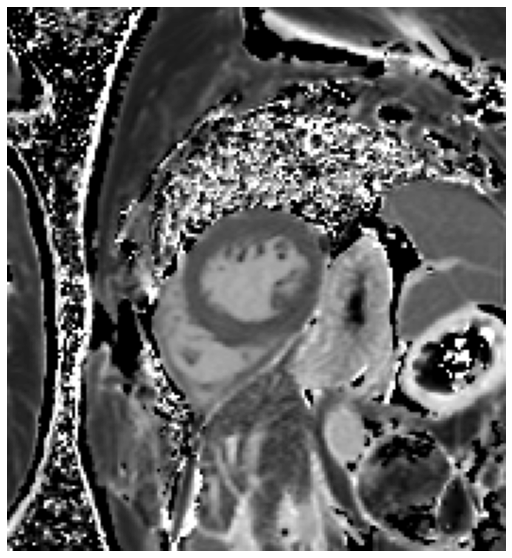

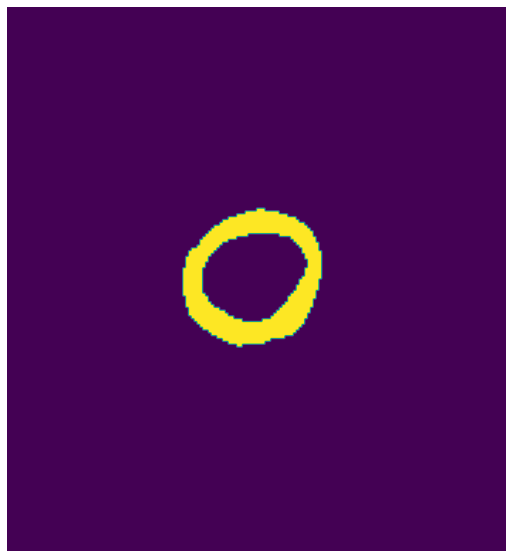

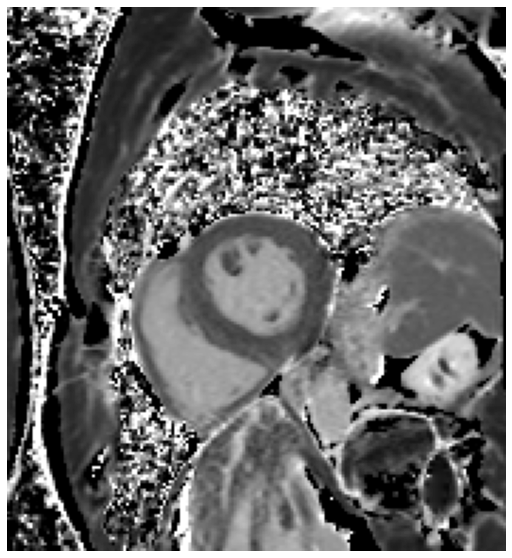

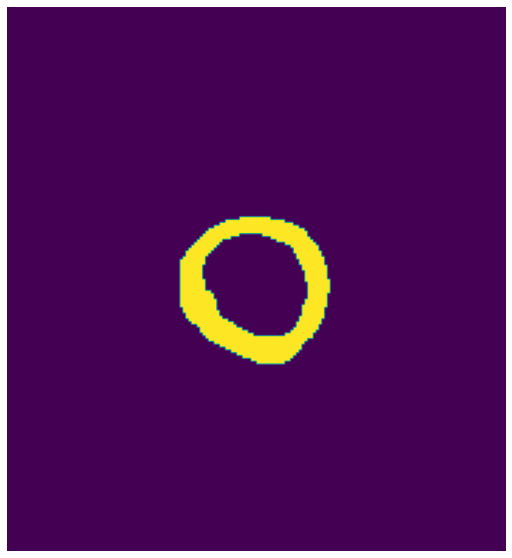

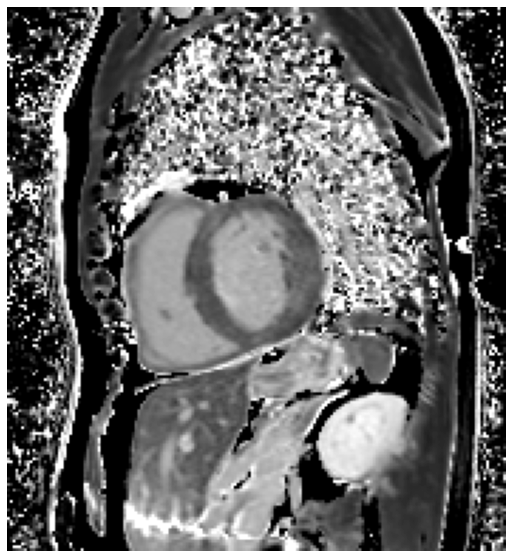

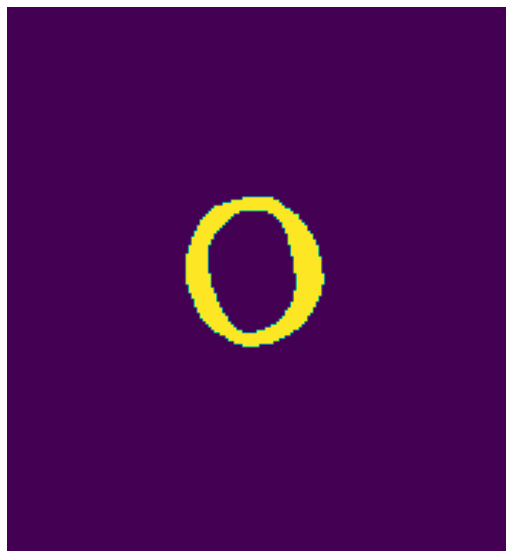

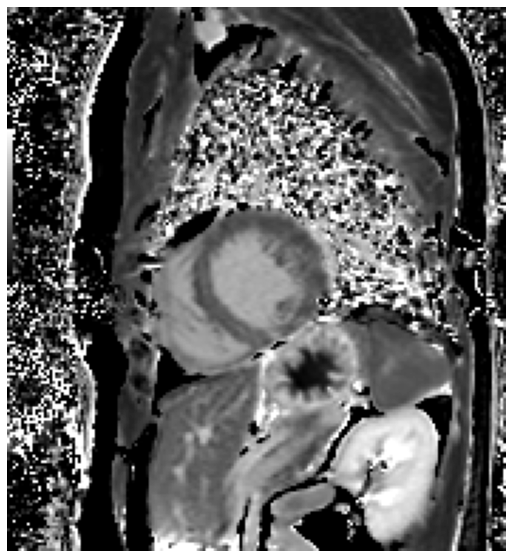

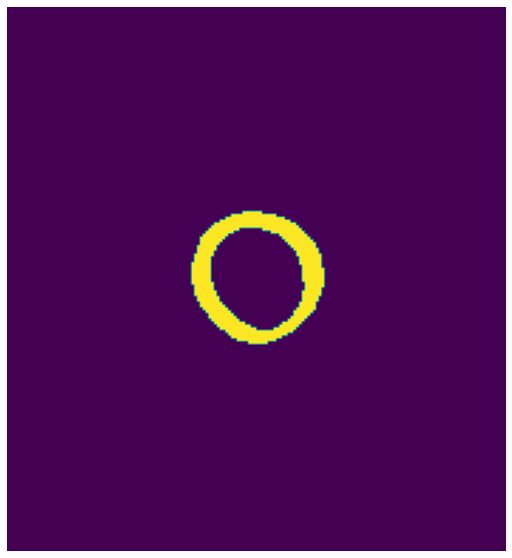

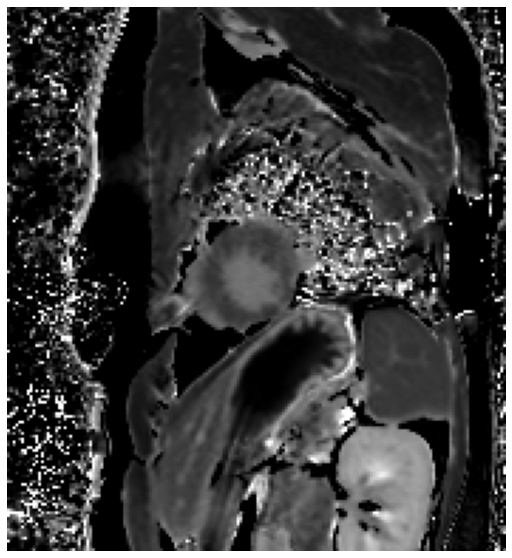

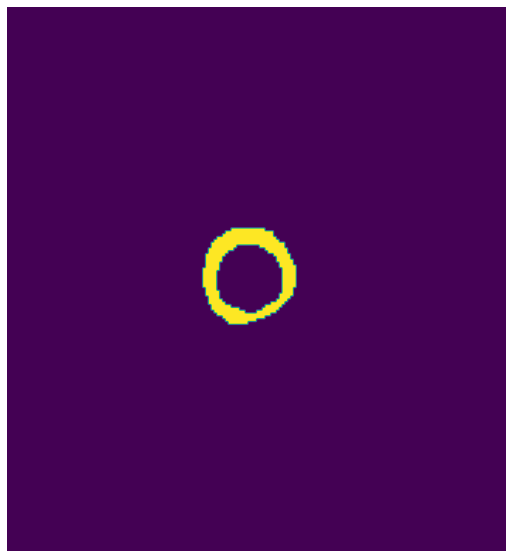

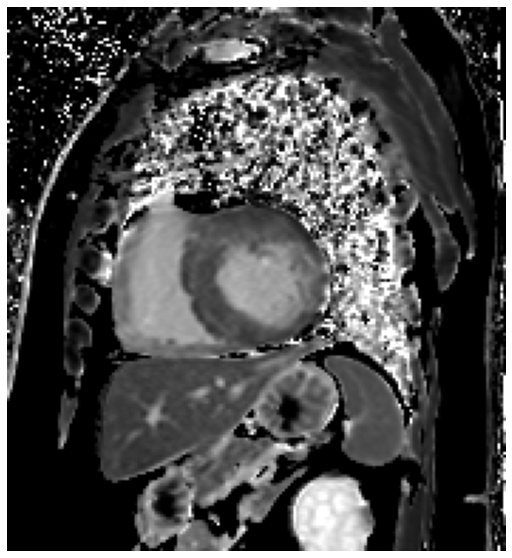

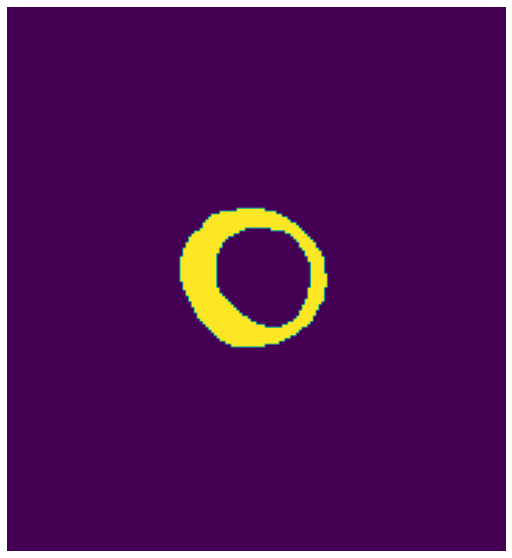

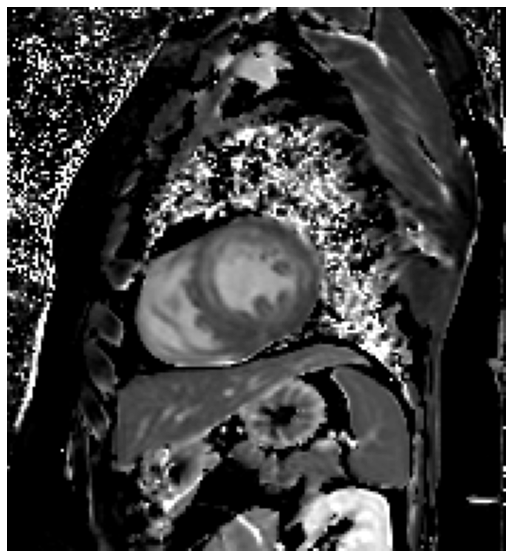

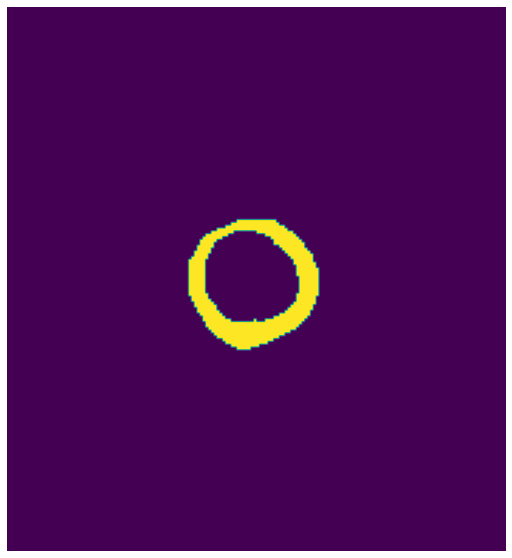

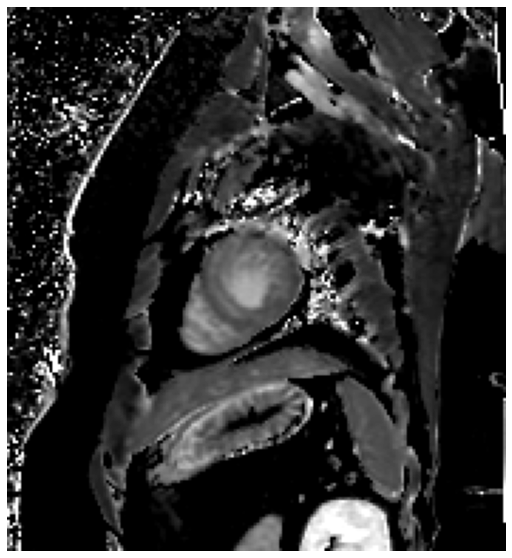

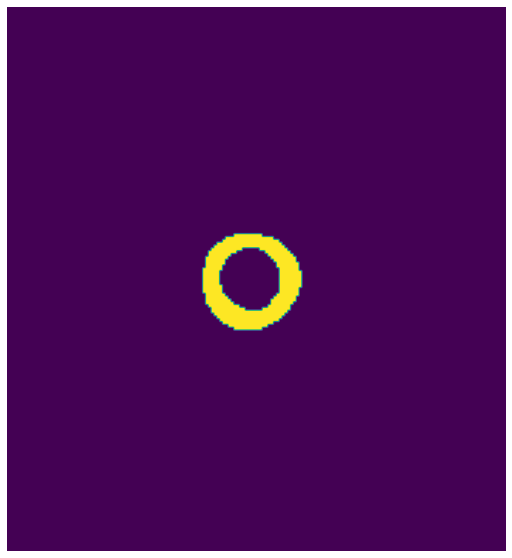

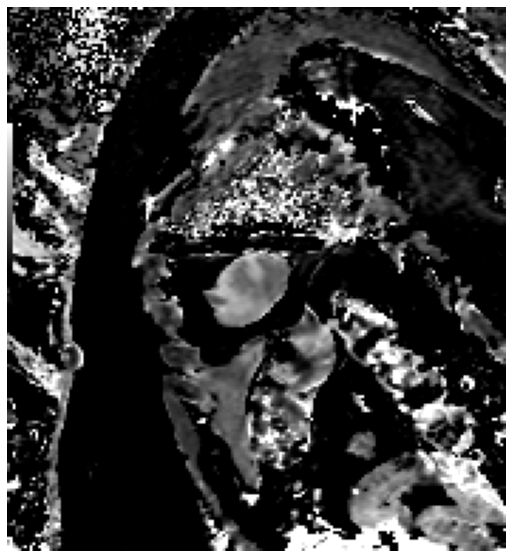

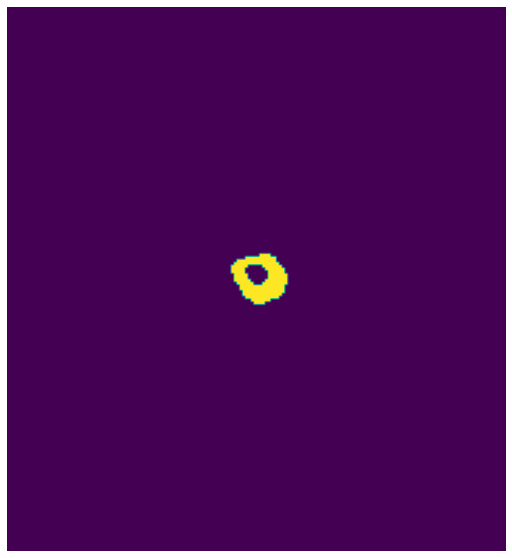

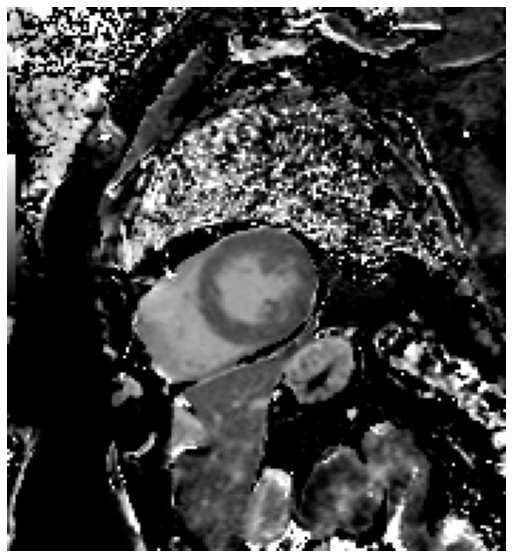

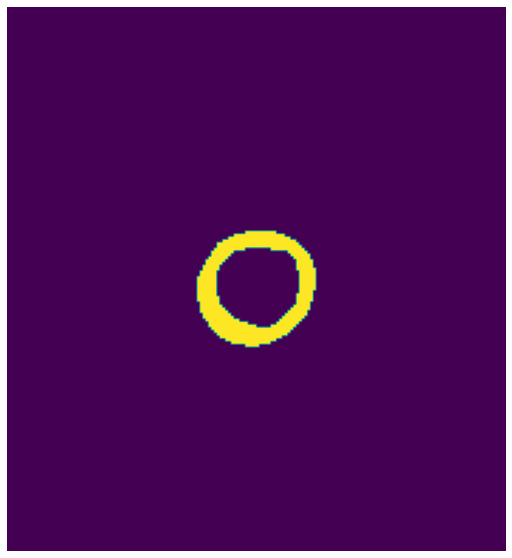

In [ ]:
print(labels[200:210])
import matplotlib.pyplot as plt
from skimage import io
for x in range(100,110):
  img = images[x]/1000
  plt.figure(figsize=(10, 10))
  plt.imshow(img.reshape(192,176),cmap="gray")
  plt.axis("off")

  img = masks[x]
  plt.figure(figsize=(10, 10))
  plt.imshow(img.reshape(192,176))
  plt.axis("off")


(-0.5, 175.5, 191.5, -0.5)

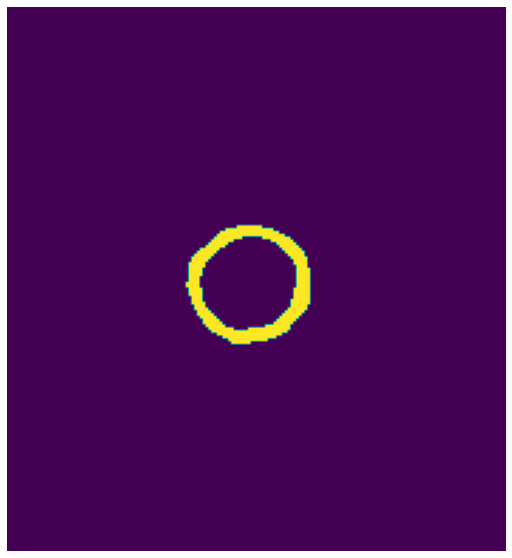

In [ ]:
img = masks[150]
plt.figure(figsize=(10, 10))
plt.imshow(img.reshape(192,176))
plt.axis("off")

FUll function

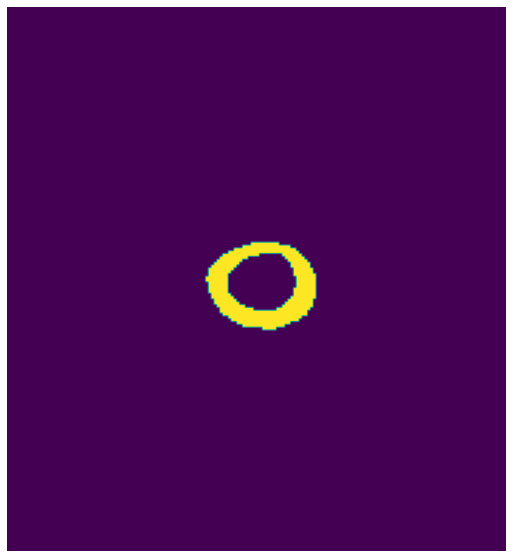

83 113 70 108


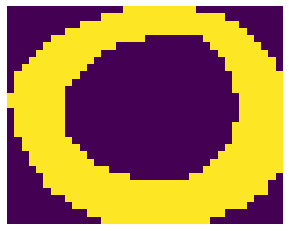

(30, 38)


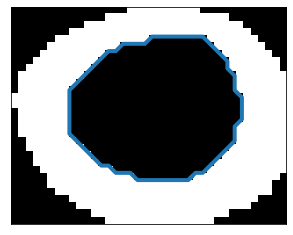

[24.4 25.  26.  26.4 27.  27.4 28.  28.4 29.  29.4 30.  30.4 30.4 30.4
 31.  31.4 31.4 31.4 31.4 31.  30.4 30.4 30.4 30.  29.4 29.4 29.  28.4
 28.  27.4 27.  26.4 26.  25.  24.  23.  22.  21.  20.  19.  18.6 18.
 17.  16.  15.  14.6 14.  13.  12.6 12.  11.6 11.  10.6 10.   9.6  9.
  8.6  8.   7.6  7.6  7.6  7.6  7.6  7.6  7.6  8.   8.6  9.   9.6 10.
 10.6 11.  11.6 12.  13.  13.6 14.  15.  16.  16.6 17.  18.  19.  20.
 21.  22.  23.  24.  24.4]
[23.  22.4 22.4 22.  21.4 21.  20.4 20.  19.4 19.  18.4 18.  17.  16.
 15.4 15.  14.  13.  12.  11.6 11.  10.   9.   8.6  8.   7.   6.6  6.
  5.6  5.   4.6  4.   3.6  3.6  3.6  3.6  3.6  3.6  3.6  3.6  4.   4.6
  4.6  4.6  4.6  5.   5.6  5.6  6.   6.6  7.   7.6  8.   8.6  9.   9.6
 10.  10.6 11.  12.  13.  14.  15.  16.  17.  17.4 18.  18.4 19.  19.4
 20.  20.4 21.  21.4 21.4 22.  22.4 22.4 22.4 23.  23.4 23.4 23.4 23.4
 23.4 23.4 23.4 23.4 23. ]
[24, 25, 26, 26, 27, 27, 28, 28, 29, 29, 30, 30, 30, 30, 31, 31, 31, 31, 31, 31, 30, 30, 30, 30, 29,

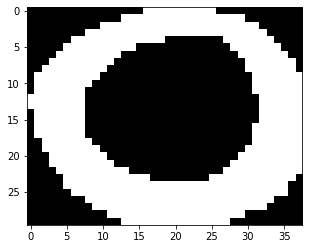

In [ ]:
# mask no
x=5
# reshape image
imag = masks[5].reshape(192,176)
# show selected image
plt.figure(figsize=(10, 10))
plt.imshow(imag)
plt.axis("off")
plt.show()
# take square image around the segmentation mask
x_min = imag.shape[1]
x_max = 0
y_min = imag.shape[0]
y_max = 0

for y in range(imag.shape[1]): #176 w y
  for x in range(imag.shape[0]): #192 h x
      if imag[x][y]==1:
          if x<x_min:
            x_min = x
          if x>x_max:
            x_max = x

          if y<y_min:
            y_min = y
          if y>y_max:
            y_max = y
print(x_min, x_max, y_min, y_max)


# show the squared mask image
plt.imshow(imag[x_min:x_max, y_min:y_max]) #x h, y w 
plt.axis("off")
plt.show()
crop = imag[x_min:x_max, y_min:y_max]
print(crop.shape)


# create contour in the image

import numpy as np
import matplotlib.pyplot as plt

from skimage import measure
# Find contours at a constant value of 0.8
contours = measure.find_contours(crop, 0.4)

# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(crop, cmap=plt.cm.gray)

#for contour in contours:
#    ax.plot(contour[:, 1], contour[:, 0], linewidth=4)
#    print("x")
ax.plot(contours[2][:, 1], contours[2][:, 0], linewidth=4)
ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()


# round the contour values
print((contours[2][:,1]))
print((contours[2][:,0]))

c_x_w=[]
for item in (contours[2][:,1]):
  c_x_w.append(round(item))

c_y_w=[]
for item in (contours[2][:,0]):
  c_y_w.append(round(item))

print(c_x_w)
print(c_y_w)

# fill the inside area of the contour
crp = crop.copy()
c_x_w = np.array(c_x_w)
c_y_w = np.array(c_y_w)
"""
for w in c_x_w:
   indice= np.where(c_x_w==w)[0]
   crp[min(c_y_w[indice]):max(c_y_w[indice])+1,w]=1

"""
plt.imshow(crp,cmap="gray")


In [ ]:
print(min(contours[2][:,1]),max(contours[2][:,1]))#w
print(min(contours[2][:,0]),max(contours[2][:,0]))#h

7.6 31.4
3.6 23.4


In [ ]:
"""crp = crop.copy() 
for y in range(crop.shape[1]): #176 w y
  for x in range(crop.shape[0]): #192 h x
    if (y>round(min(contours[2][:,1])) and y<round(max(contours[2][:,1])) ):
      if (x>round(min(contours[2][:,0])) and x<round(max(contours[2][:,0]))):
        crp[x,y]=1
plt.imshow(crp)
plt.show()
"""

'crp = crop.copy() \nfor y in range(crop.shape[1]): #176 w y\n  for x in range(crop.shape[0]): #192 h x\n    if (y>round(min(contours[2][:,1])) and y<round(max(contours[2][:,1])) ):\n      if (x>round(min(contours[2][:,0])) and x<round(max(contours[2][:,0]))):\n        crp[x,y]=1\nplt.imshow(crp)\nplt.show()\n'

In [ ]:
print((contours[2][:,1]))
print((contours[2][:,0]))

c_x_w=[]
for item in (contours[2][:,1]):
  c_x_w.append(round(item))

c_y_w=[]
for item in (contours[2][:,0]):
  c_y_w.append(round(item))

print(c_x_w)
print(c_y_w)

[24.4 25.  26.  26.4 27.  27.4 28.  28.4 29.  29.4 30.  30.4 30.4 30.4
 31.  31.4 31.4 31.4 31.4 31.  30.4 30.4 30.4 30.  29.4 29.4 29.  28.4
 28.  27.4 27.  26.4 26.  25.  24.  23.  22.  21.  20.  19.  18.6 18.
 17.  16.  15.  14.6 14.  13.  12.6 12.  11.6 11.  10.6 10.   9.6  9.
  8.6  8.   7.6  7.6  7.6  7.6  7.6  7.6  7.6  8.   8.6  9.   9.6 10.
 10.6 11.  11.6 12.  13.  13.6 14.  15.  16.  16.6 17.  18.  19.  20.
 21.  22.  23.  24.  24.4]
[23.  22.4 22.4 22.  21.4 21.  20.4 20.  19.4 19.  18.4 18.  17.  16.
 15.4 15.  14.  13.  12.  11.6 11.  10.   9.   8.6  8.   7.   6.6  6.
  5.6  5.   4.6  4.   3.6  3.6  3.6  3.6  3.6  3.6  3.6  3.6  4.   4.6
  4.6  4.6  4.6  5.   5.6  5.6  6.   6.6  7.   7.6  8.   8.6  9.   9.6
 10.  10.6 11.  12.  13.  14.  15.  16.  17.  17.4 18.  18.4 19.  19.4
 20.  20.4 21.  21.4 21.4 22.  22.4 22.4 22.4 23.  23.4 23.4 23.4 23.4
 23.4 23.4 23.4 23.4 23. ]
[24, 25, 26, 26, 27, 27, 28, 28, 29, 29, 30, 30, 30, 30, 31, 31, 31, 31, 31, 31, 30, 30, 30, 30, 29,

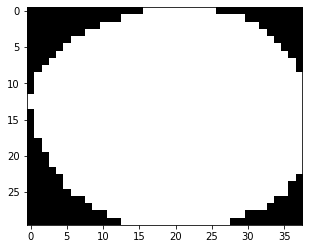

In [ ]:
crp = crop.copy()
c_x_w = np.array(c_x_w)
c_y_w = np.array(c_y_w)

for w in c_x_w:
   indice= np.where(c_x_w==w)[0]
   crp[min(c_y_w[indice]):max(c_y_w[indice])+1,w]=1

plt.imshow(crp,cmap="gray")

In [ ]:
max(c_y_w[indice]),min(c_y_w[indice]) 

(34, 6)

ANother function

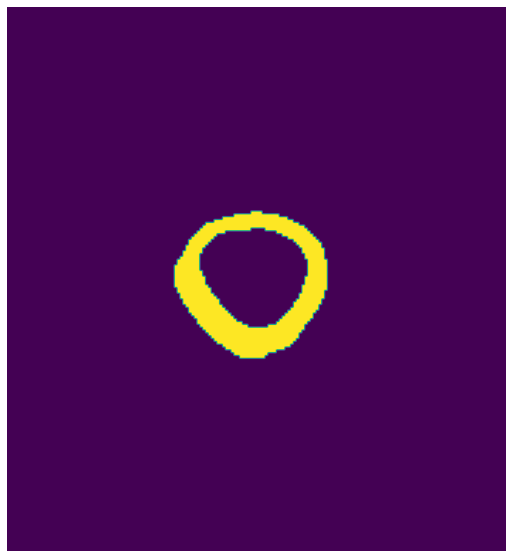

72 123 59 112


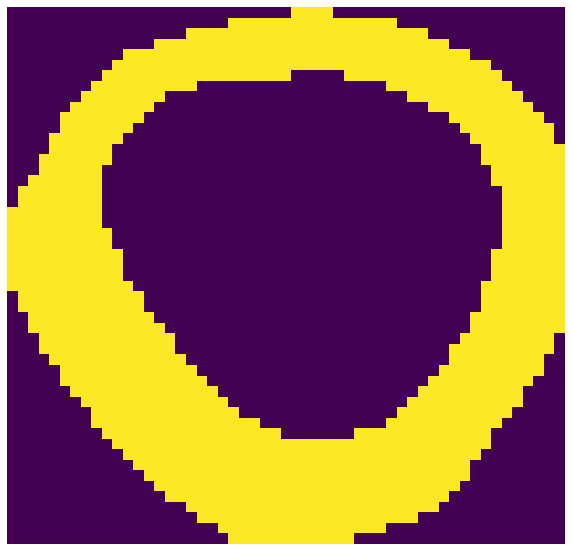

(192, 176)


<Figure size 720x720 with 0 Axes>

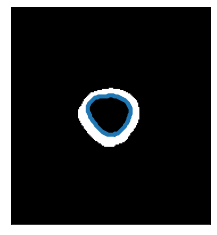

[ 91.4  92.   93.   94.   94.4  95.   95.4  96.   96.4  97.   97.4  98.
  98.4  99.   99.4 100.  100.4 100.4 101.  101.4 102.  102.4 102.4 103.
 103.4 103.4 103.4 104.  104.4 104.4 104.4 105.  105.4 105.4 105.4 105.4
 105.4 105.4 105.  104.4 104.4 104.  103.4 103.4 103.  102.4 102.  101.4
 101.  100.4 100.   99.   98.4  98.   97.   96.4  96.   95.   94.4  94.
  93.   92.   91.   90.4  90.   89.   88.   87.   86.   85.6  85.   84.
  83.   82.   81.   80.   79.   78.   77.   76.6  76.   75.   74.   73.6
  73.   72.6  72.   71.6  71.   70.6  70.   69.6  69.   68.6  68.6  68.
  67.6  67.6  67.6  67.6  67.6  67.6  68.   68.6  68.6  69.   69.6  69.6
  69.6  70.   70.6  71.   71.6  71.6  72.   72.6  73.   73.6  74.   74.6
  74.6  75.   75.6  76.   76.6  77.   77.6  78.   78.6  79.   79.6  80.
  80.6  81.   82.   82.6  83.   84.   84.6  85.   86.   87.   88.   89.
  90.   91.   91.4]
[112.  111.4 111.4 111.4 111.  110.4 110.  109.4 109.  108.4 108.  107.4
 107.  106.4 106.  105.4 105.  104.  1

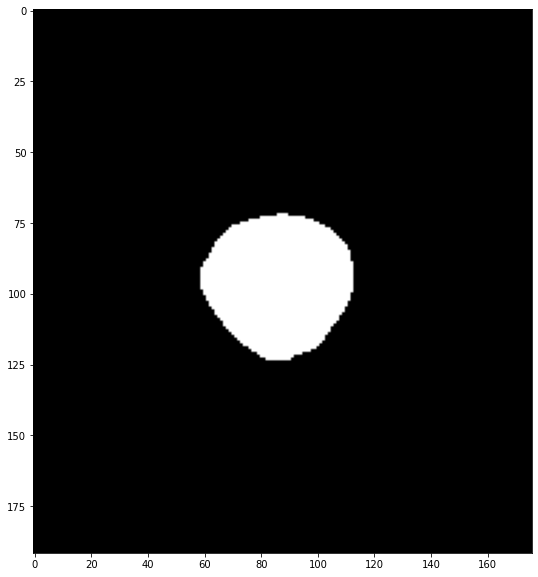

cropped image


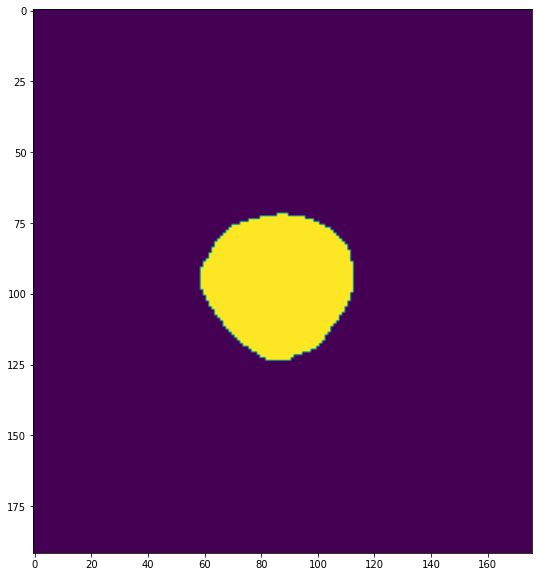

In [ ]:
# mask no
t=250
# reshape image
imag = masks[t].reshape(192,176)
# show selected image
plt.figure(figsize=(10, 10))
plt.imshow(imag)
plt.axis("off")
plt.show()
# take square image around the segmentation mask
x_min = imag.shape[1]
x_max = 0
y_min = imag.shape[0]
y_max = 0

for y in range(imag.shape[1]): #176 w y
  for x in range(imag.shape[0]): #192 h x
      if imag[x][y]==1:
          if x<x_min:
            x_min = x
          if x>x_max:
            x_max = x

          if y<y_min:
            y_min = y
          if y>y_max:
            y_max = y
print(x_min, x_max, y_min, y_max)


# show the squared mask image
plt.figure(figsize=(10, 10))
plt.imshow(imag[x_min:x_max, y_min:y_max]) #x h, y w 
plt.axis("off")
plt.show()
#crop = imag[x_min:x_max, y_min:y_max]
crop = imag#[x_min:x_max, y_min:y_max]
print(crop.shape)


# create contour in the image

import numpy as np
import matplotlib.pyplot as plt

from skimage import measure
# Find contours at a constant value of 0.8
contours = measure.find_contours(crop, 0.4)

# Display the image and plot all contours found
plt.figure(figsize=(10, 10))
fig, ax = plt.subplots()
ax.imshow(crop, cmap=plt.cm.gray)

#for contour in contours:
#    ax.plot(contour[:, 1], contour[:, 0], linewidth=4)
#    print("x")
ax.plot(contours[1][:, 1], contours[1][:, 0], linewidth=4)
ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()


# round the contour values
print((contours[1][:,1]))
print((contours[1][:,0]))

c_x_w=[]
for item in (contours[1][:,1]):
  c_x_w.append(round(item))

c_y_w=[]
for item in (contours[1][:,0]):
  c_y_w.append(round(item))

print(c_x_w)
print(c_y_w)

# fill the inside area of the contour
crp = crop.copy()
c_x_w = np.array(c_x_w)
c_y_w = np.array(c_y_w)

for w in c_x_w:
   indice= np.where(c_x_w==w)[0]
   crp[min(c_y_w[indice]):max(c_y_w[indice])+1,w]=1

print("full image")
plt.figure(figsize=(10, 10))
plt.imshow(crp,cmap="gray")
plt.show()
print("cropped image")
plt.figure(figsize=(10, 10))
#crp = crp[x_min:x_max, y_min:y_max]
plt.imshow(crp)
plt.show()

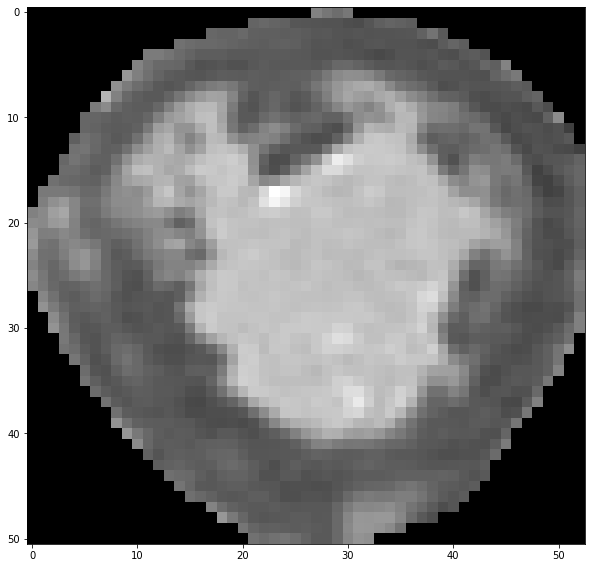

In [ ]:
plt.figure(figsize=(10, 10))
amp = images[t].reshape(192,176)*crp
plt.imshow(amp[x_min:x_max, y_min:y_max],cmap="gray")
plt.show()

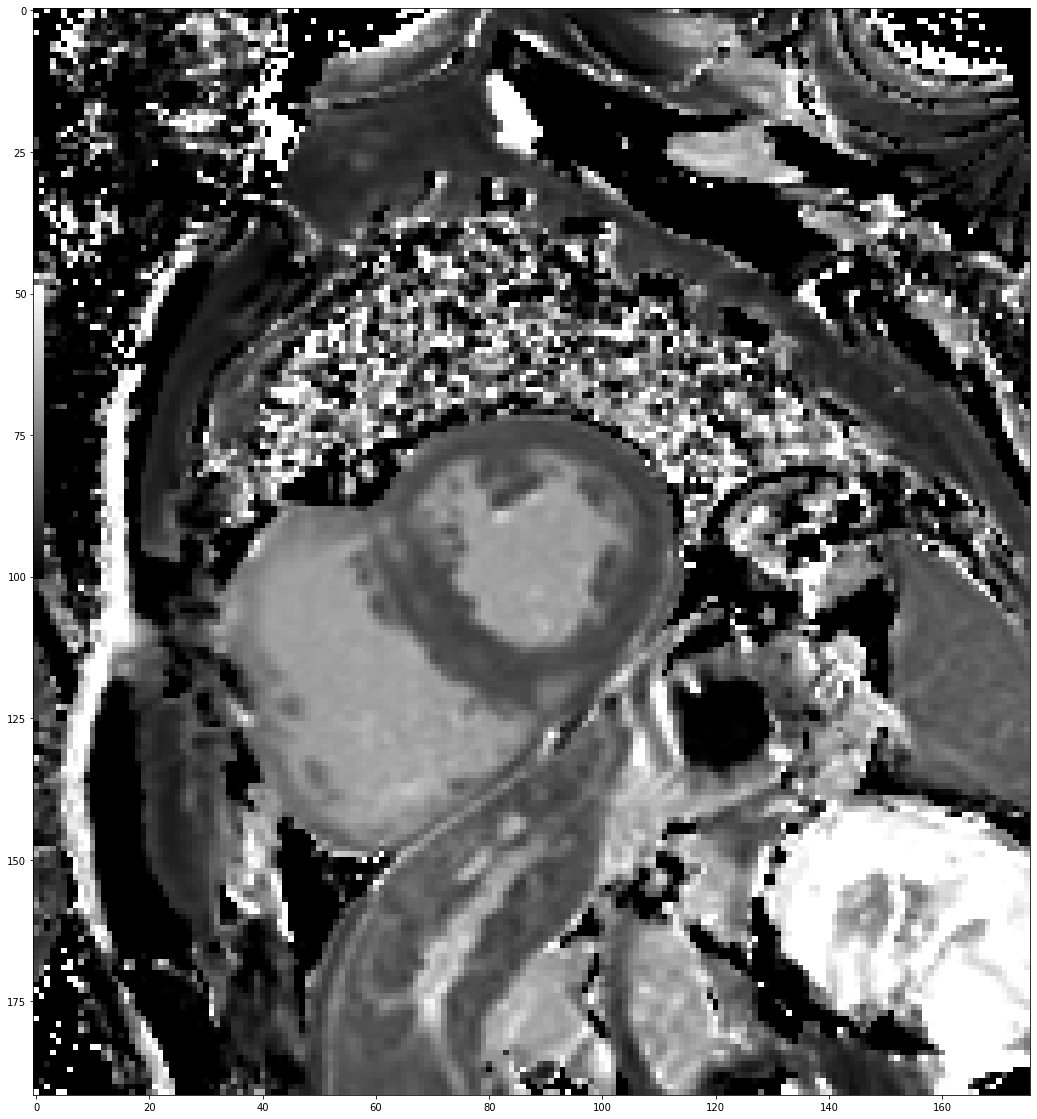

In [ ]:
plt.figure(figsize=(20, 20))
plt.imshow(images[t].reshape(192,176),cmap="gray")
plt.show()

Final 

In [ ]:
from skimage.transform import resize
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure
# mask no
donuts=[]
for t in range(0,len(masks)):
# reshape image
  imag = masks[t].reshape(192,176)

  # show selected image
  """
  plt.figure(figsize=(10, 10))
  plt.imshow(imag)
  plt.axis("off")
  plt.show()
  """

  # take square image around the segmentation mask
  x_min = imag.shape[1]
  x_max = 0
  y_min = imag.shape[0]
  y_max = 0

  for y in range(imag.shape[1]): #176 w y
    for x in range(imag.shape[0]): #192 h x
        if imag[x][y]==1:
            if x<x_min:
              x_min = x
            if x>x_max:
              x_max = x

            if y<y_min:
              y_min = y
            if y>y_max:
              y_max = y
  #print(x_min, x_max, y_min, y_max)

  # show the squared mask image
  """
  plt.figure(figsize=(10, 10))
  plt.imshow(imag[x_min:x_max, y_min:y_max]) #x h, y w 
  plt.axis("off")
  plt.show()
  """

  crop = imag#[x_min:x_max, y_min:y_max]
  #print(crop.shape)

  # create contour in the image

  # Find contours at a constant value of 0.8
  contours = measure.find_contours(crop, 0.4)

  # Display the image and plot all contours found
  """
  plt.figure(figsize=(10, 10))
  fig, ax = plt.subplots()
  ax.imshow(crop, cmap=plt.cm.gray)

  #for contour in contours:
  ax.plot(contours[1][:, 1], contours[1][:, 0], linewidth=4)
  ax.axis('image')
  ax.set_xticks([])
  ax.set_yticks([])
  plt.show()
  """

  # round the contour values
  
  #print((contours[1][:,1]))
  #print((contours[1][:,0]))
  
  """
  c_x_w=[]
  for item in (contours[1][:,1]):
    c_x_w.append(round(item))

  c_y_w=[]
  for item in (contours[1][:,0]):
    c_y_w.append(round(item))

  """  
  #print(c_x_w)
  #print(c_y_w)
  
  # fill the inside area of the contour
  crp = crop.copy()
  c_x_w = np.array(c_x_w)
  c_y_w = np.array(c_y_w)
  """
  for w in c_x_w:
    indice= np.where(c_x_w==w)[0]
    crp[min(c_y_w[indice]):max(c_y_w[indice])+1,w]=1

  """  
  """
  print("full image")
  plt.figure(figsize=(10, 10))
  plt.imshow(crp,cmap="gray")
  plt.show()

  print("cropped image")
  plt.figure(figsize=(10, 10))
  plt.imshow(crp)
  plt.show()
  """

  #cropped image
  #plt.figure(figsize=(10, 10))
  amp = images[t].reshape(192,176)*crp
  #print(amp[x_min:x_max, y_min:y_max].shape)
  image_resized = resize(amp[x_min:x_max, y_min:y_max],(50,50),anti_aliasing=True)
  donuts.append(image_resized)
  
  #plt.imshow(donuts[t],cmap="gray")
  #plt.show()
  
  """
  #original image
  plt.figure(figsize=(20, 20))
  plt.imshow(images[t].reshape(192,176),cmap="gray")
  plt.show()
  """


In [ ]:
np.save("/content/donuts.npy",np.array(donuts))

In [ ]:
y_train = pd.get_dummies(pd.read_csv("/content/ECV_labels.csv")["Labels"]).to_numpy()
y_train.shape

(514, 5)

In [ ]:
np.array(donuts).reshape(514,50*50).shape

(514, 2500)

In [ ]:
x_train = np.array(donuts).reshape(514,50*50)
print(x_train.shape)
y_train = pd.get_dummies(pd.read_csv("/content/ECV_labels.csv")["Labels"]).to_numpy()
print(y_train.shape)

(514, 2500)
(514, 5)


Epoch 1/150
14/14 [==============================] - 3s 38ms/step - loss: 378.3431 - accuracy: 0.2661 - val_loss: 16.2157 - val_accuracy: 0.0000e+00
Epoch 2/150
14/14 [==============================] - 0s 14ms/step - loss: 10.2066 - accuracy: 0.4335 - val_loss: 1.8304 - val_accuracy: 0.0000e+00
Epoch 3/150
14/14 [==============================] - 0s 15ms/step - loss: 1.6913 - accuracy: 0.4725 - val_loss: 1.9426 - val_accuracy: 0.0000e+00
Epoch 4/150
14/14 [==============================] - 0s 14ms/step - loss: 1.8523 - accuracy: 0.4656 - val_loss: 2.1085 - val_accuracy: 0.0000e+00
Epoch 5/150
14/14 [==============================] - 0s 13ms/step - loss: 1.9272 - accuracy: 0.4702 - val_loss: 2.2627 - val_accuracy: 0.0000e+00
Epoch 6/150
14/14 [==============================] - 0s 15ms/step - loss: 1.3540 - accuracy: 0.4725 - val_loss: 2.4636 - val_accuracy: 0.0000e+00
Epoch 7/150
14/14 [==============================] - 0s 14ms/step - loss: 2.2984 - accuracy: 0.4679 - val_loss: 2.6496 -

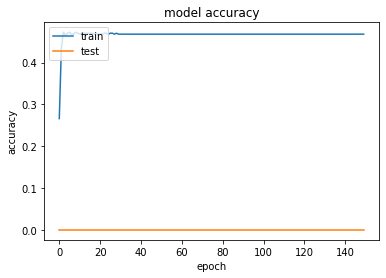

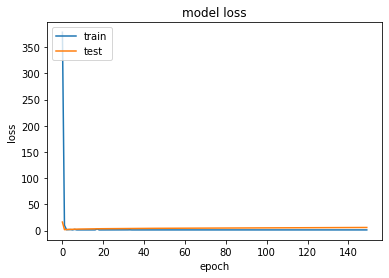

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam, Adadelta, RMSprop
import keras.backend as K


keras.utils.set_random_seed(42)
model = Sequential()
model.add(Dense(64, input_shape = (2500,), activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(32, activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(16, activation = "relu"))#added
model.add(Dropout(0.3))#added
model.add(Dense(5, activation = "softmax"))
model.compile(Adam(lr = 0.01), "categorical_crossentropy", metrics = ["accuracy"])
#model.summary()
logdir = "/content/logs"
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

history = model.fit(x_train, y_train, validation_split=0.15,verbose=1, epochs=150, callbacks=[tensorboard_callback])

# list all data in history
import matplotlib.pyplot as plt# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
model.save("/content/model_3.h5", save_format="h5")


(514, 50, 50, 3)
(514, 5)
Epoch 1/30
14/14 [==============================] - 76s 5s/step - loss: 104.4526 - accuracy: 0.4495 - val_loss: 5.2977 - val_accuracy: 0.0000e+00
Epoch 2/30
14/14 [==============================] - 67s 5s/step - loss: 1.3041 - accuracy: 0.4954 - val_loss: 4.7501 - val_accuracy: 0.0000e+00
Epoch 3/30
14/14 [==============================] - 75s 5s/step - loss: 1.3243 - accuracy: 0.4725 - val_loss: 8.1416 - val_accuracy: 0.0000e+00
Epoch 4/30
14/14 [==============================] - 69s 5s/step - loss: 1.2559 - accuracy: 0.4839 - val_loss: 5.3935 - val_accuracy: 0.0000e+00
Epoch 5/30
14/14 [==============================] - 67s 5s/step - loss: 1.2569 - accuracy: 0.4794 - val_loss: 4.9381 - val_accuracy: 0.0000e+00
Epoch 6/30
14/14 [==============================] - 68s 5s/step - loss: 1.2320 - accuracy: 0.5069 - val_loss: 7.6693 - val_accuracy: 0.0000e+00
Epoch 7/30
14/14 [==============================] - 68s 5s/step - loss: 1.2881 - accuracy: 0.4817 - val_loss

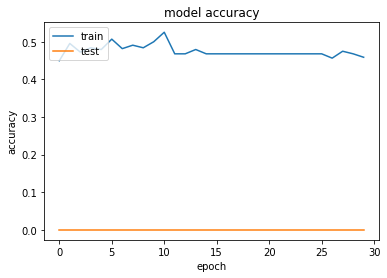

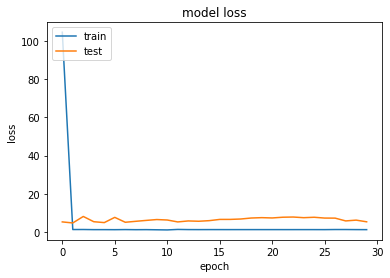

In [ ]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

model = Sequential()
model.add(Conv2D(input_shape=(50,50,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=5, activation="softmax"))


from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])




donuts = np.array(donuts)
from skimage.color import gray2rgb
x_train=[]
for i in range(len(donuts)):
  x_train.append(gray2rgb(donuts[i]))
x_train = np.array(x_train)

print(x_train.shape)
y_train = pd.get_dummies(pd.read_csv("/content/ECV_labels.csv")["Labels"]).to_numpy()
print(y_train.shape)

history = model.fit(x_train, y_train, validation_split=0.15,verbose=1, epochs=30, callbacks=[tensorboard_callback])

# list all data in history
import matplotlib.pyplot as plt# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
x=400
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#model = keras.models.load_model('/content/model_3.h5')
y_pred = model.predict(x_train[x:x+30])
y_pred_class = np.argmax(y_pred, axis=1)+1

y_test_class = y_train[x:x+30] #np.argmax(y_test, axis=1)+1
y_test_class = np.argmax(y_test_class, axis=1)+1
print(confusion_matrix(y_test_class, y_pred_class))

print(classification_report(y_test_class, y_pred_class))
df_confusion = pd.crosstab(y_test_class, y_pred_class, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(df_confusion)


1/1 [==============================] - 3s 3s/step
[[ 0  0]
 [30  0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00       0.0
           4       0.00      0.00      0.00      30.0

    accuracy                           0.00      30.0
   macro avg       0.00      0.00      0.00      30.0
weighted avg       0.00      0.00      0.00      30.0



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

Predicted   3  All
Actual            
4          30   30
All        30   30


In [ ]:
y_pred_class

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [ ]:
y_test_class

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

# New Section